#  Finding insights on User Hours

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

In [2]:
# Read cleaned csv file into a pandas dataframe
ci_df = pd.read_csv("dailycheckins-cleaned-final.csv")
ci_df = ci_df.drop(columns=['Unnamed: 0'])
ci_df

,timestamp,user,hours,project
0,2019/09/27 08:00,ned,8.00,finance-and-marketing
1,2019/09/27 08:00,robert,8.00,finance-and-marketing
2,2019/09/26 08:00,ned,4.00,finance-and-marketing
3,2019/09/26 08:00,ned,1.00,culture-and-management
4,2019/09/26 08:00,ned,1.50,project-00
5,2019/09/26 08:00,ned,1.00,project-43
6,2018/12/21 08:00,jaime,2.00,project-00
7,2018/12/21 08:00,jaime,0.50,project-47
8,2018/12/21 08:00,jaime,3.50,project-47
9,2018/12/20 08:00,jaime,1.50,project-00


In [3]:
users = ci_df.user.unique()

print(users)
print(len(users))

['ned' 'robert' 'jaime' 'catelyn' 'cersei' 'daenerys' 'jorah' 'viserys'
 'jon' 'sansa' 'arya' 'robb' 'theon' 'bran' 'joffrey' 'hound' 'tyrion'
 'khal' 'littlefinger' 'davos' 'samwell' 'stannis' 'melisandre' 'jeor'
 'bronn' 'varys' 'shae' 'margaery' 'tywin' 'talisa' 'ygritte' 'gendry'
 'tormund' 'brienne' 'person' 'ramsay' 'gilly' 'daario' 'missandei'
 'ellaria' 'tommen']
41


In [4]:
datenow = datetime.datetime(2018,11,29)
dstart = datetime.datetime(2017,6,15)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the p

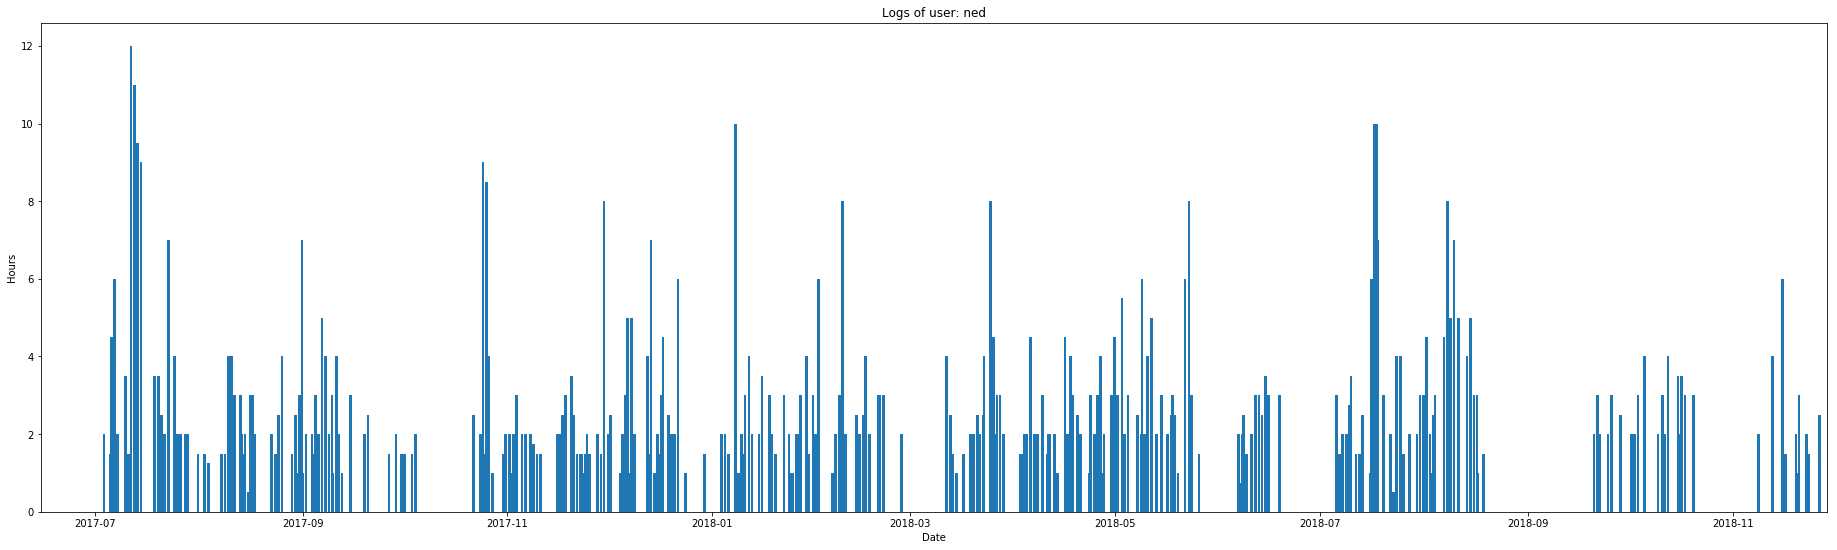

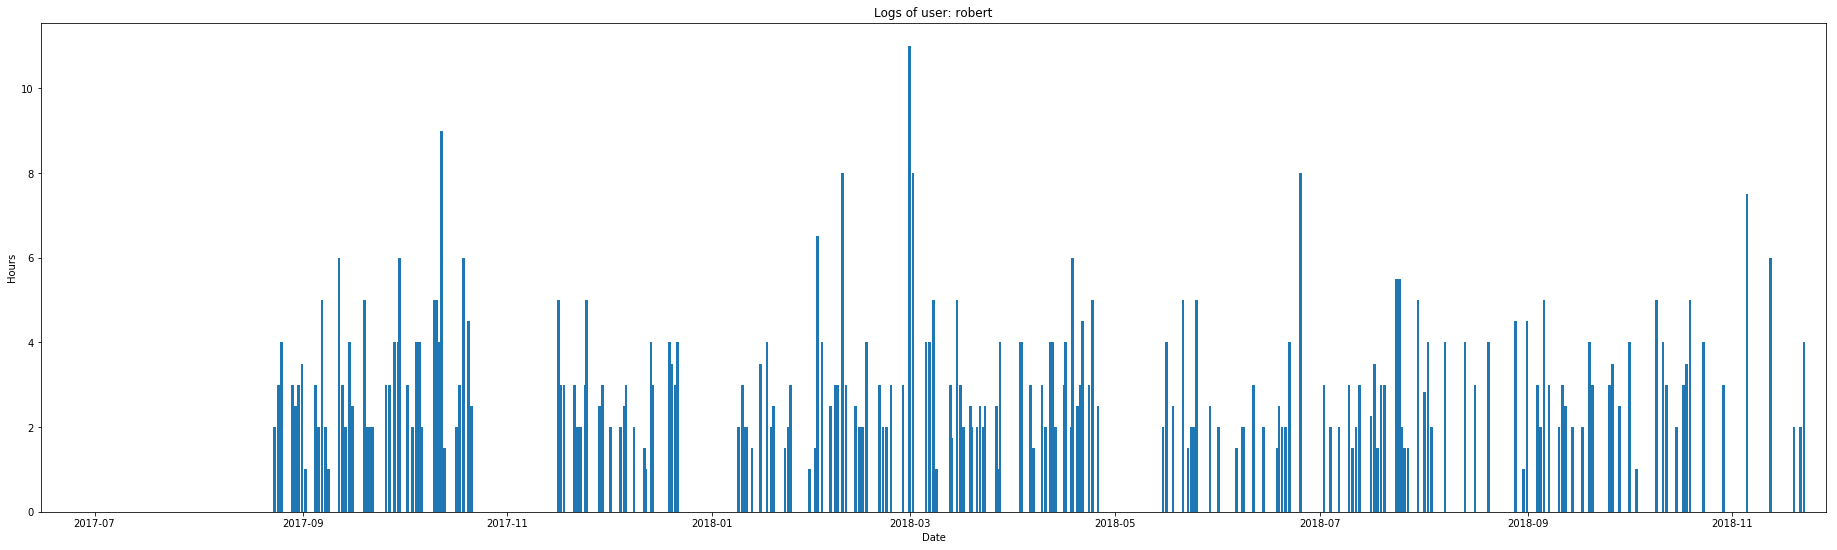

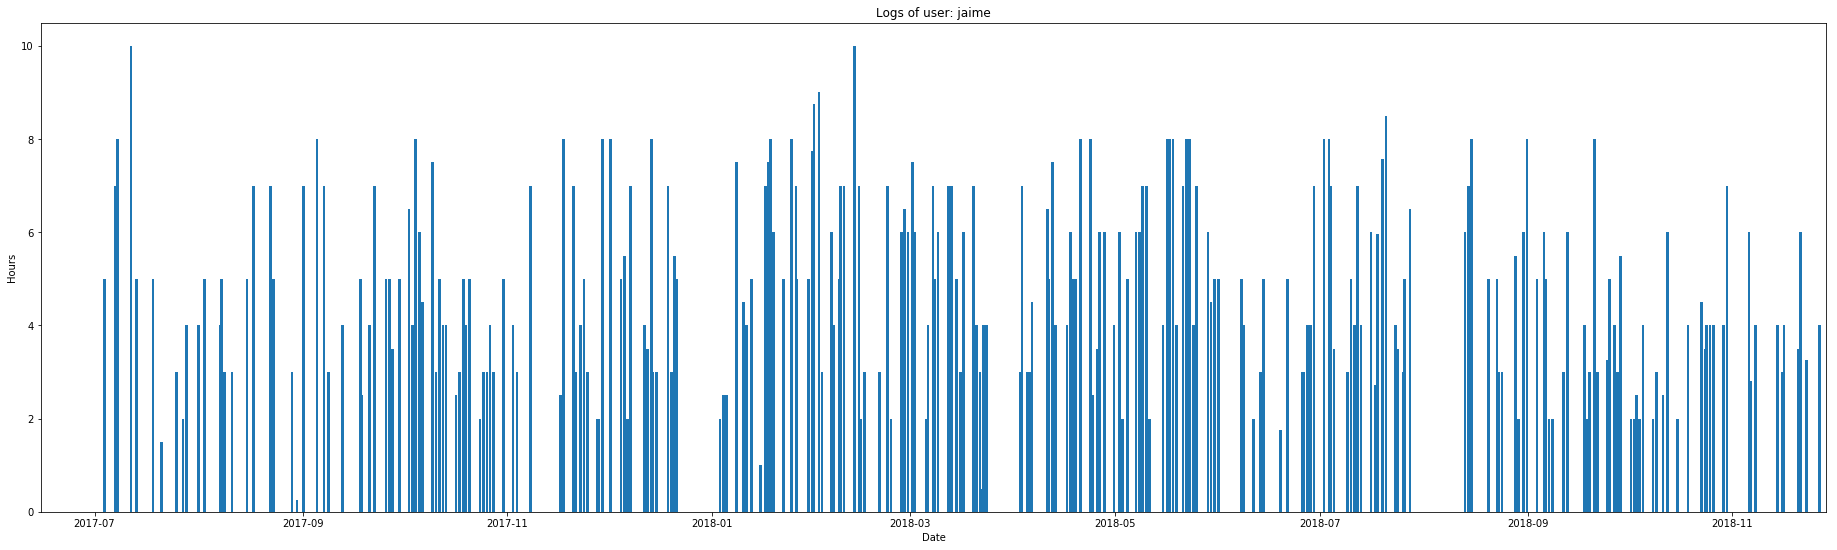

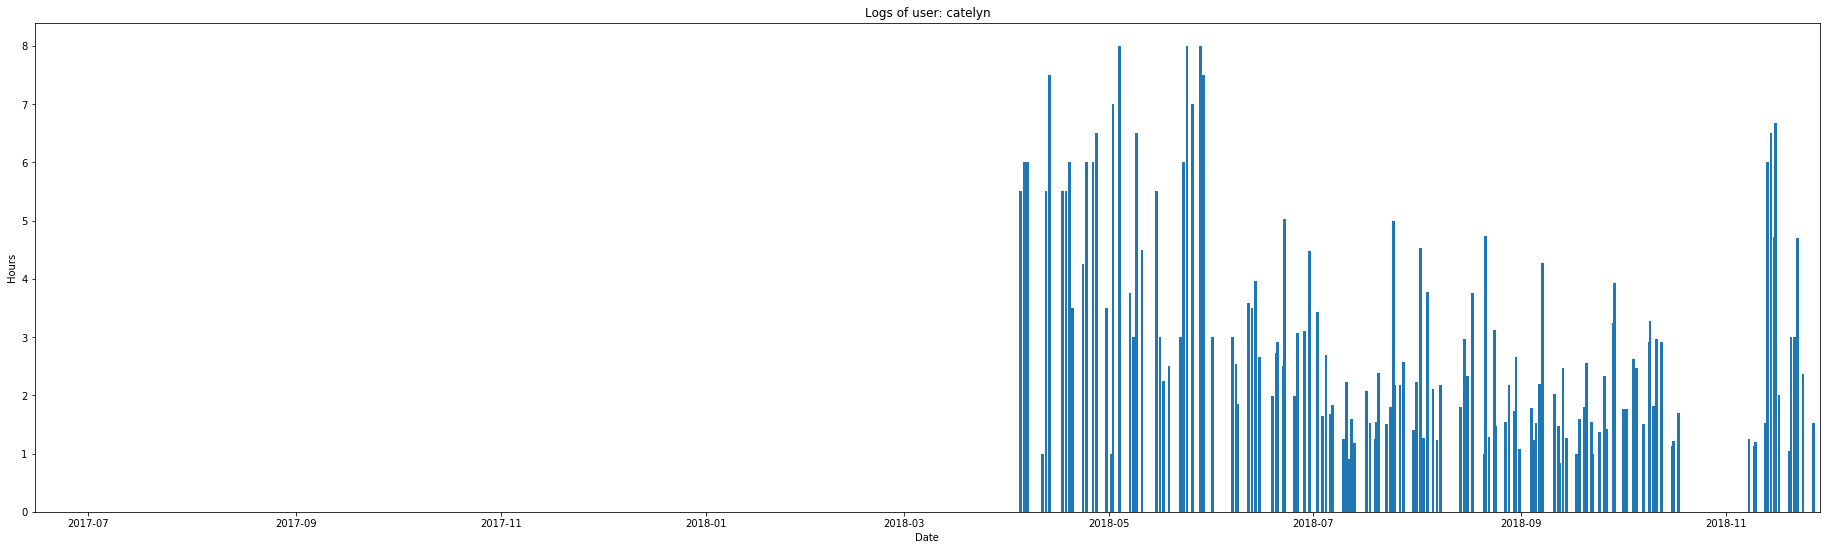

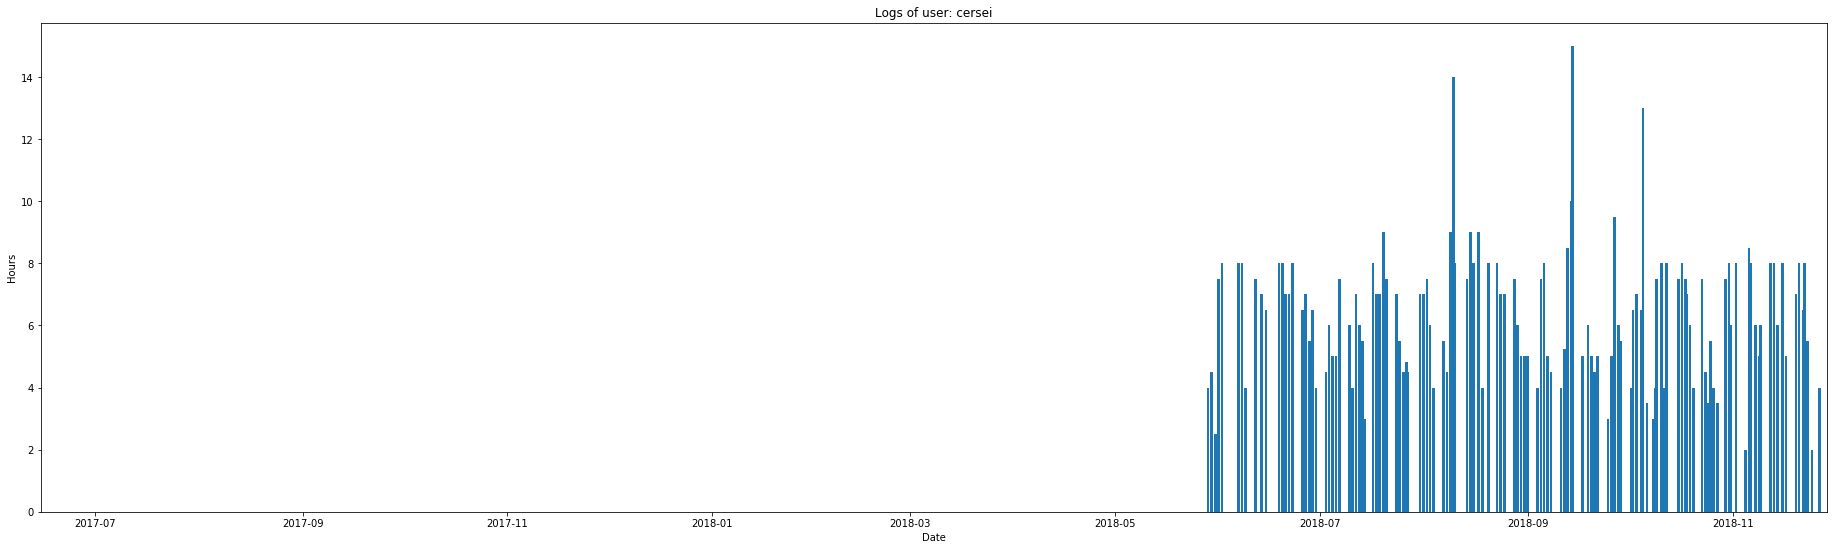

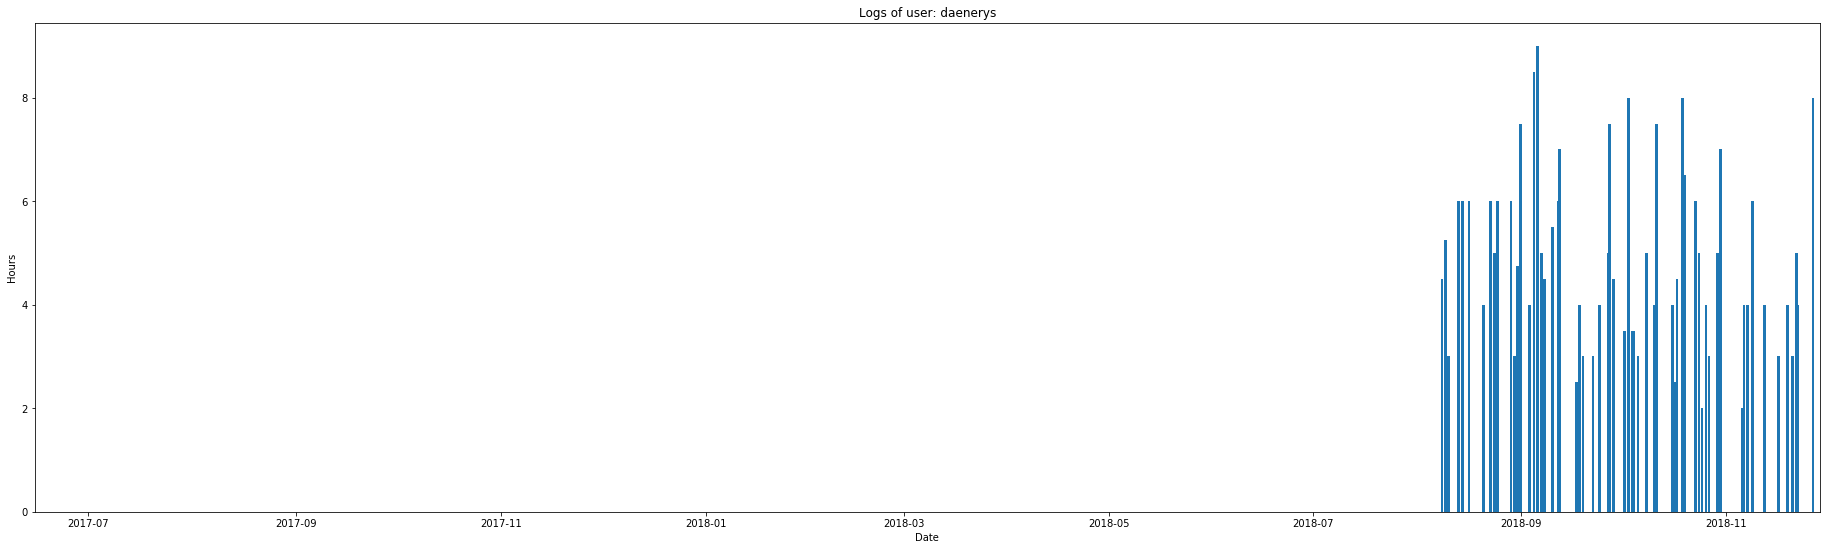

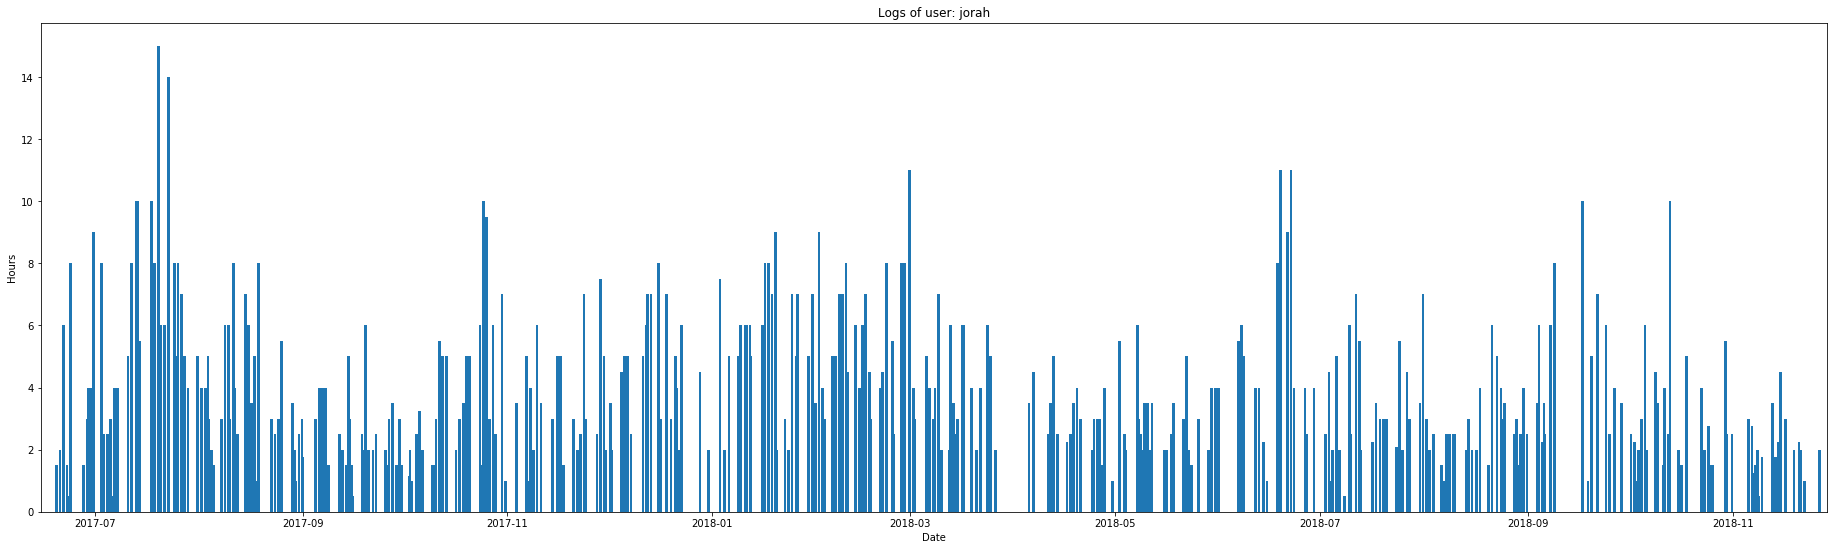

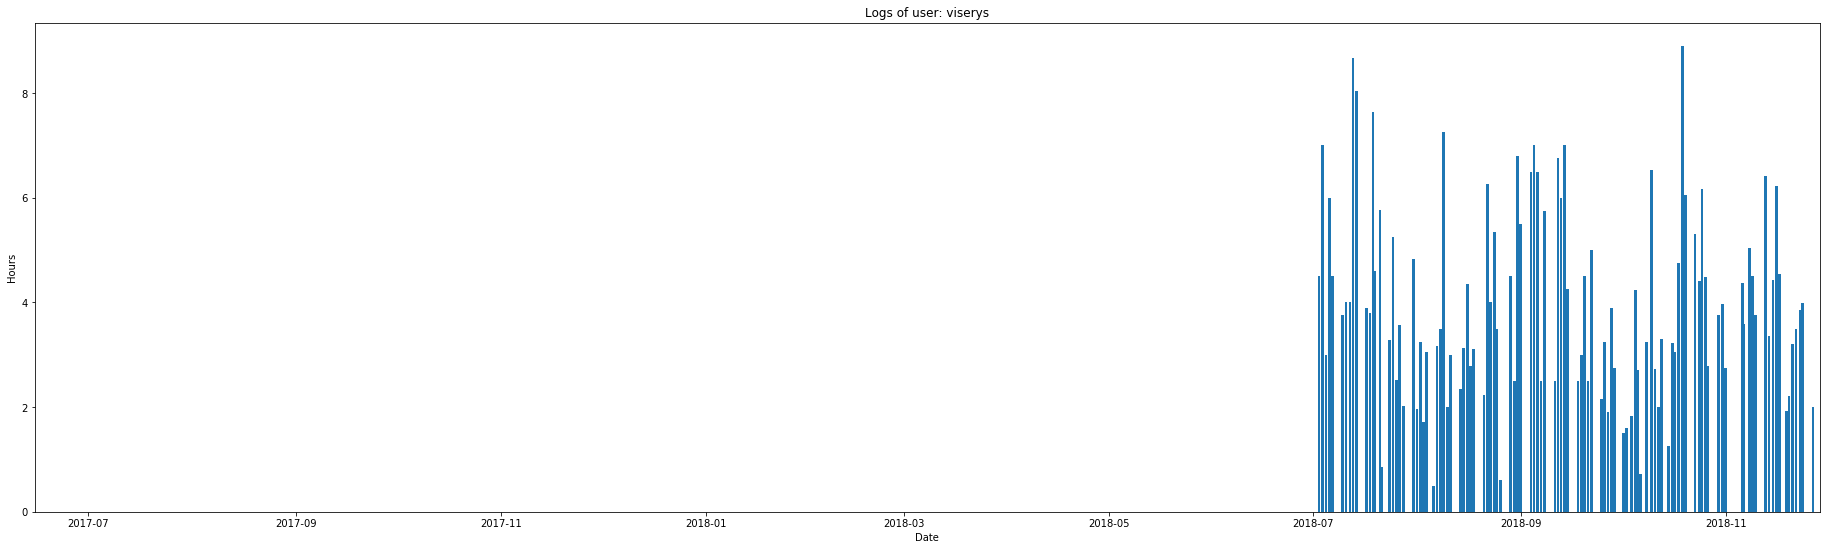

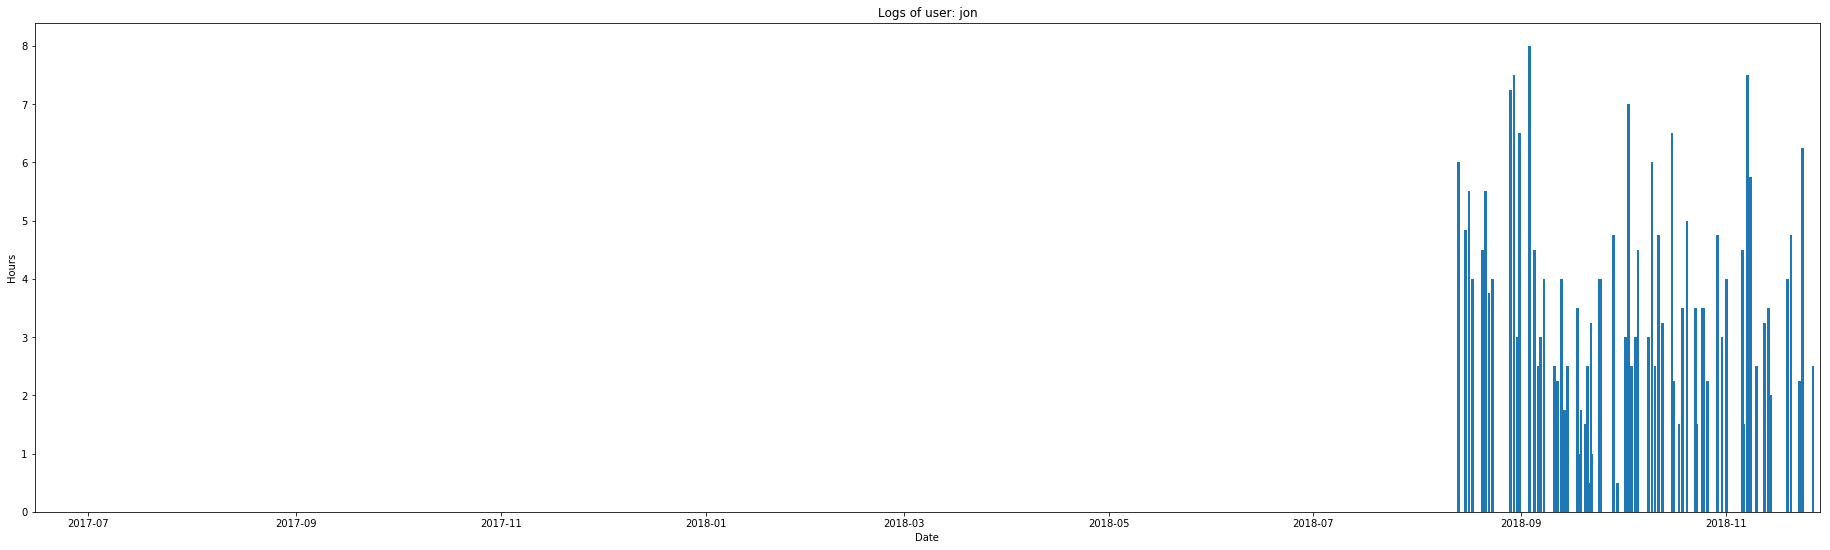

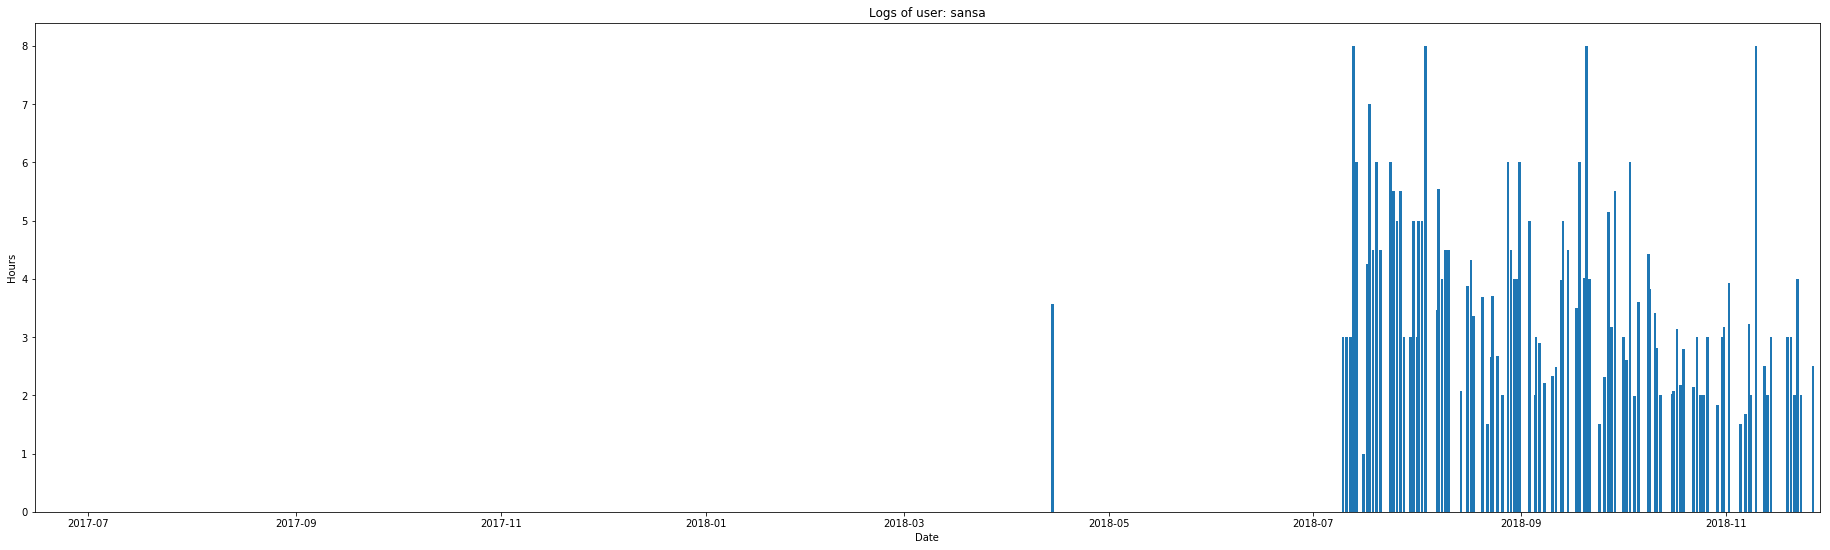

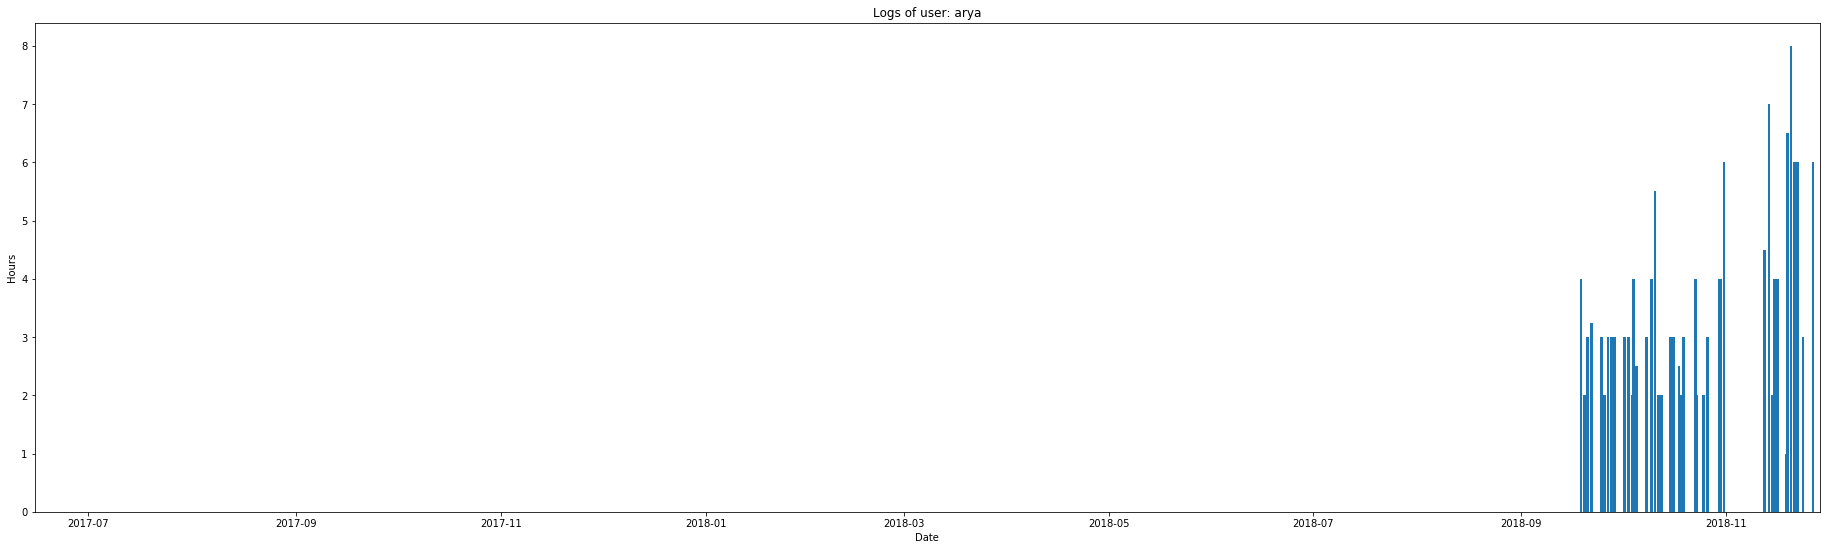

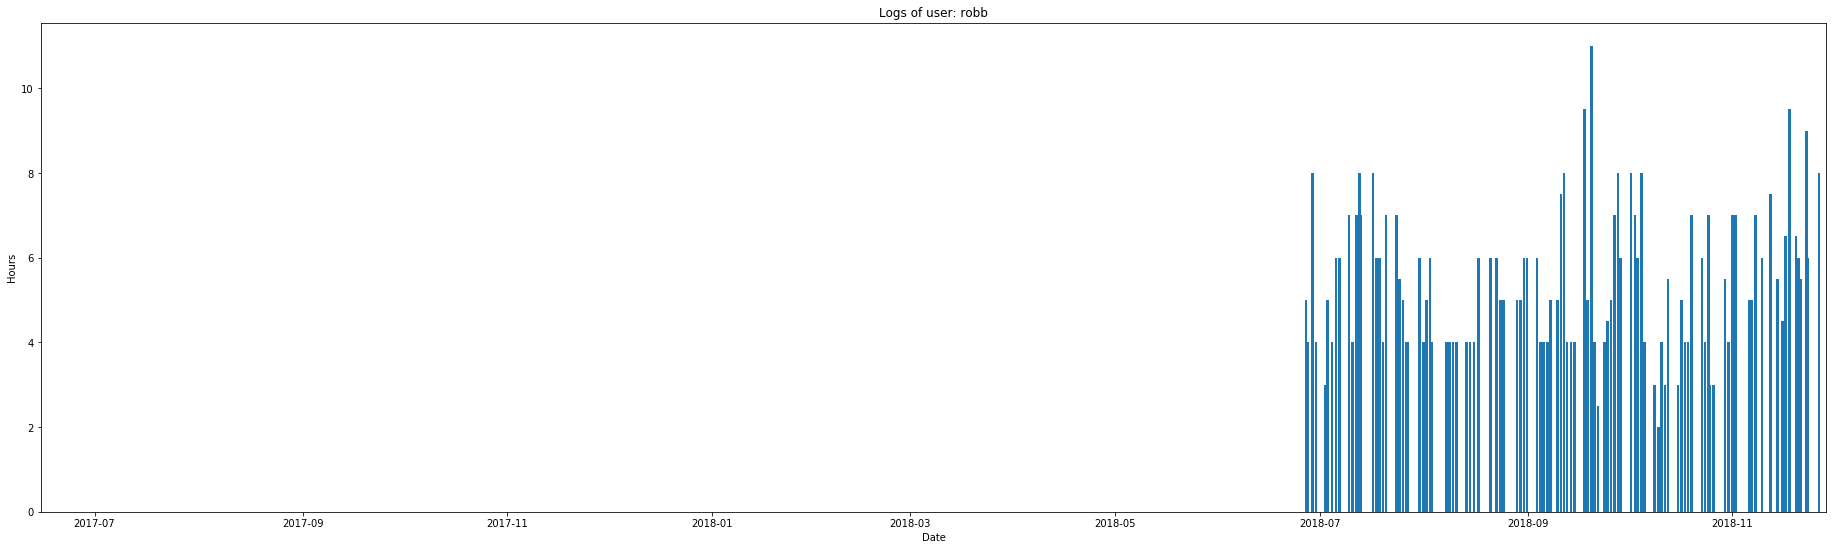

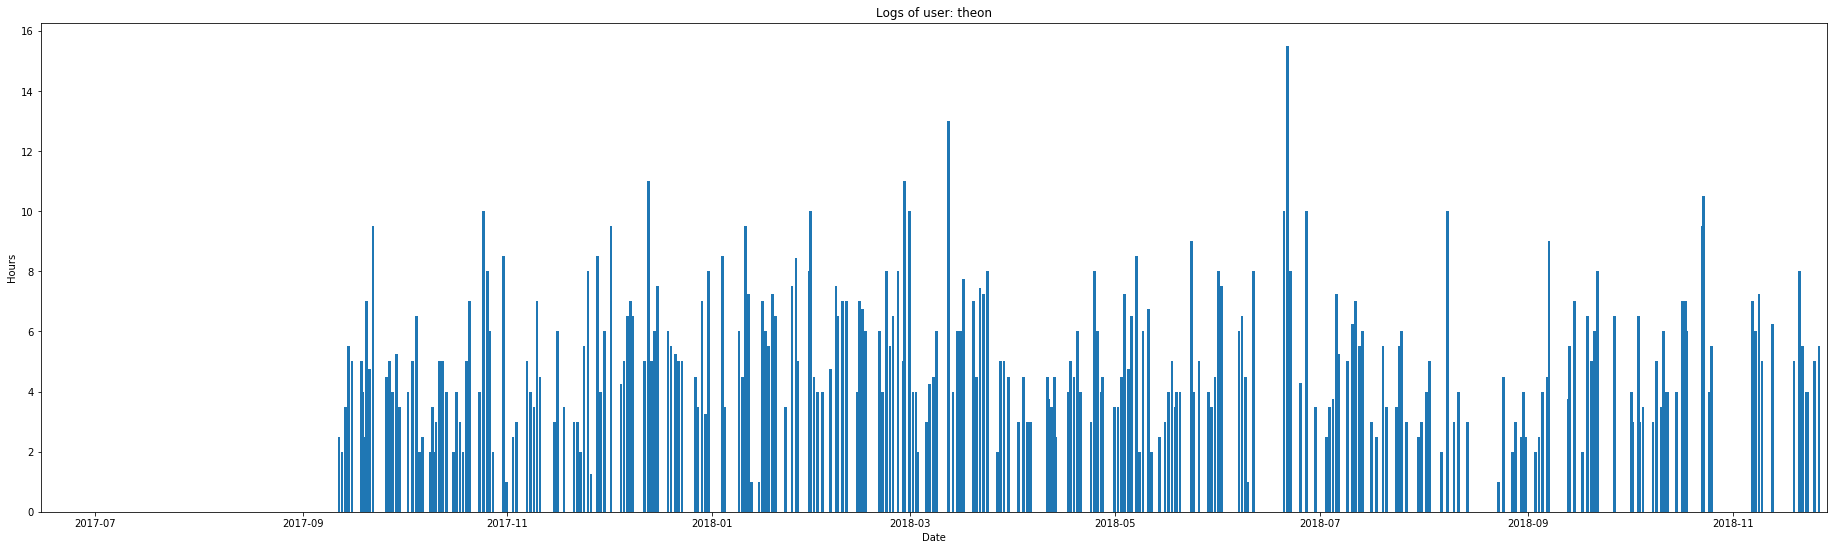

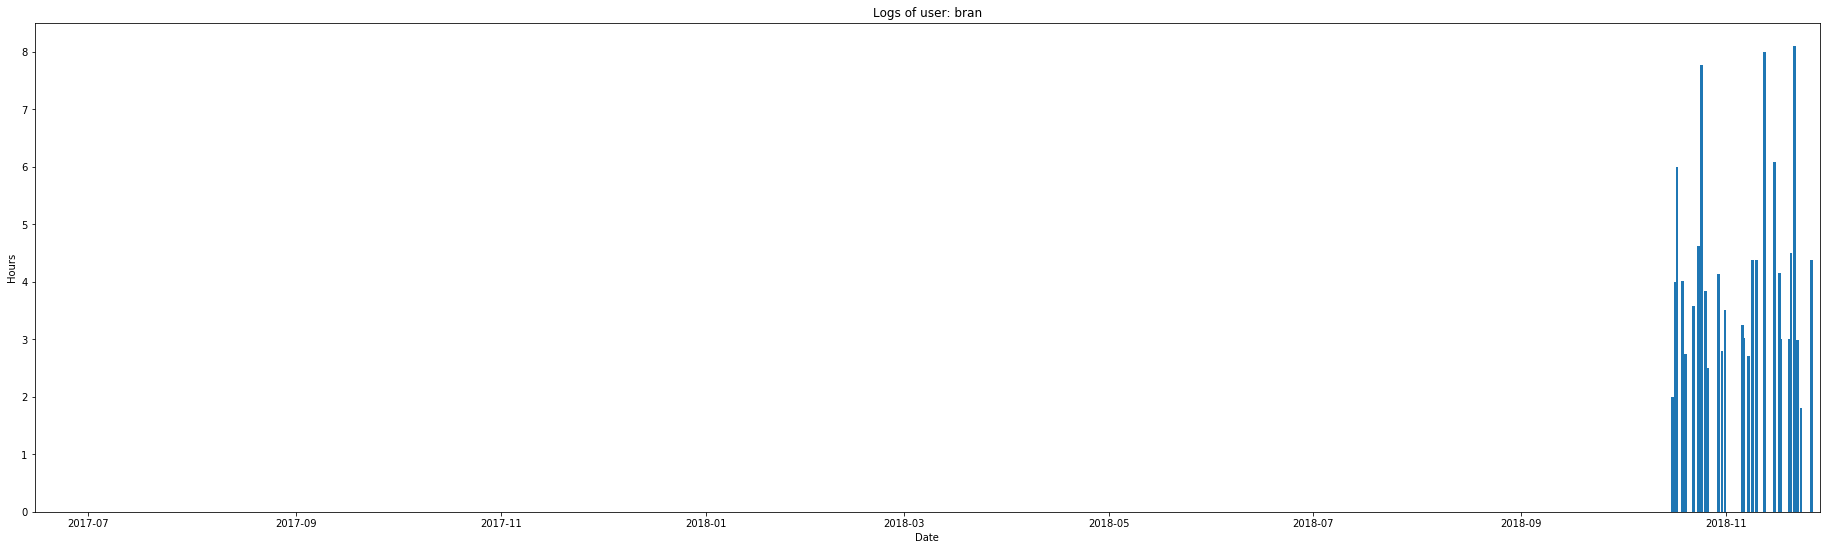

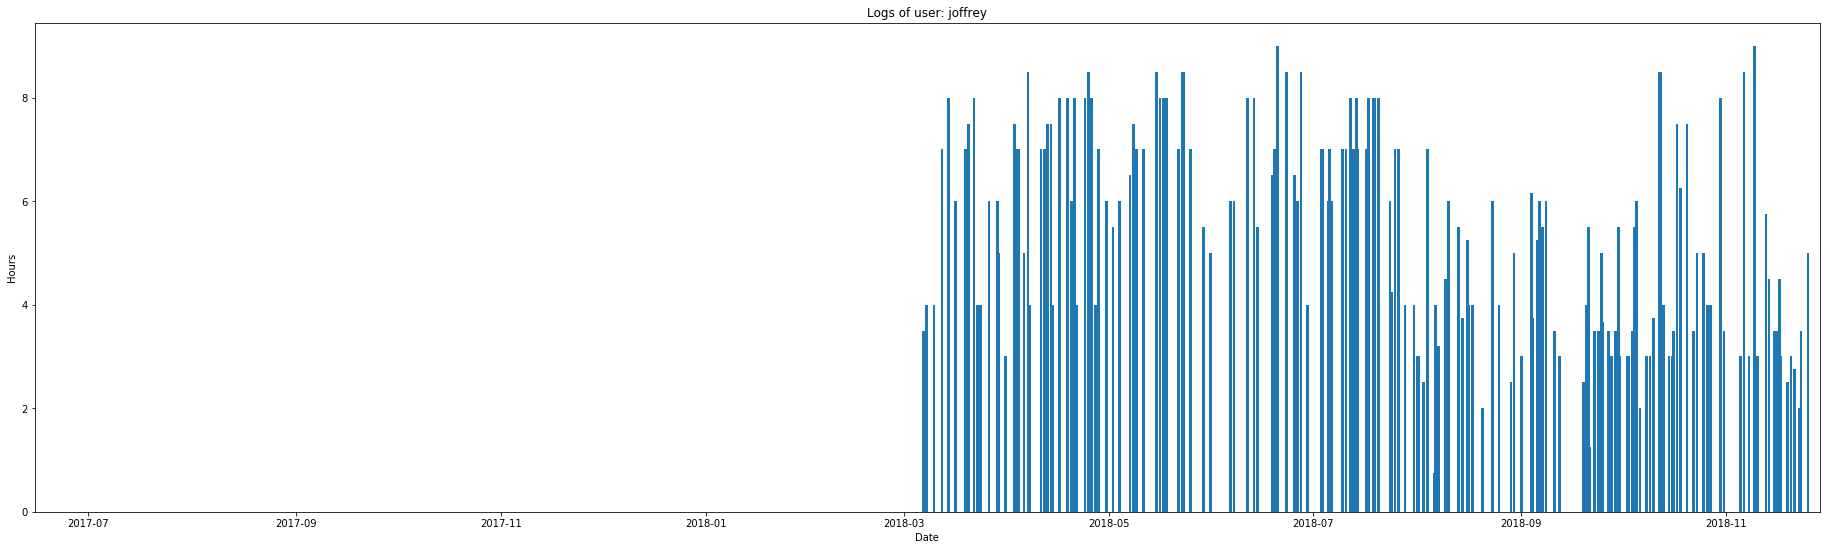

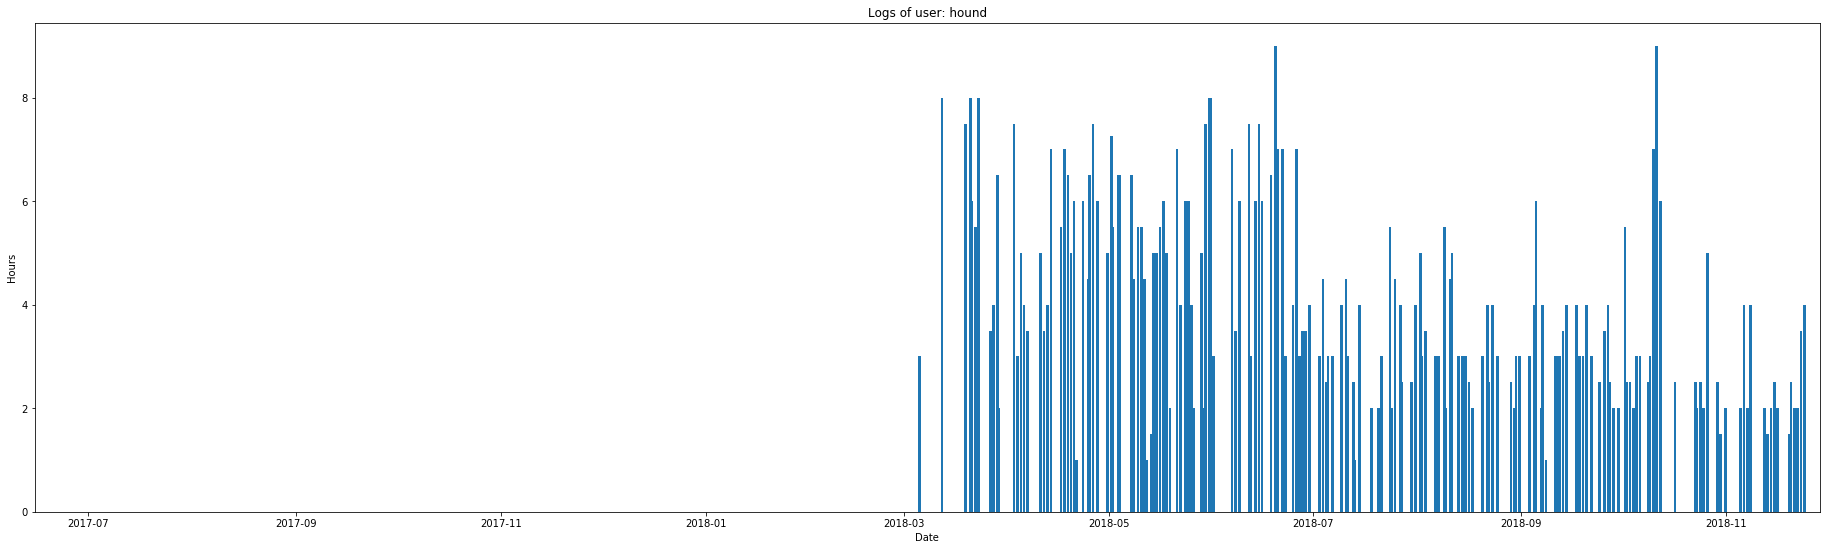

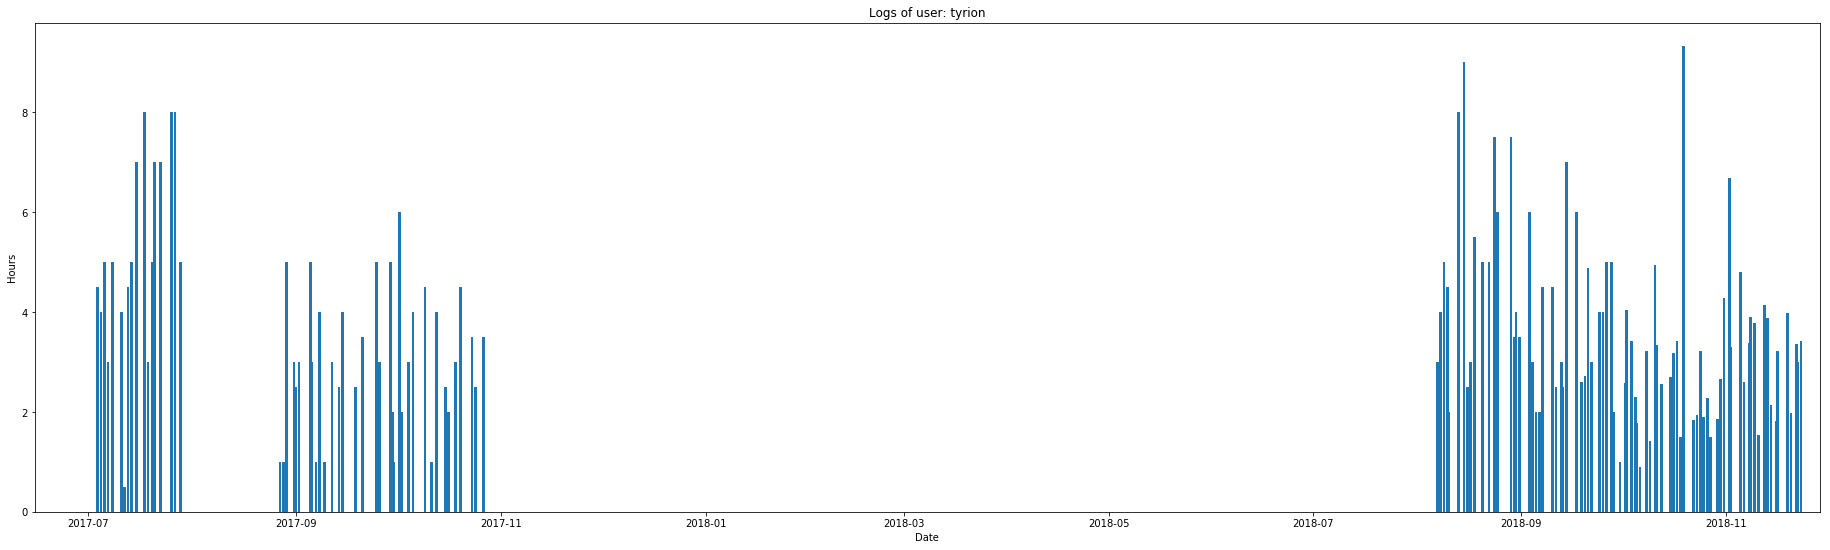

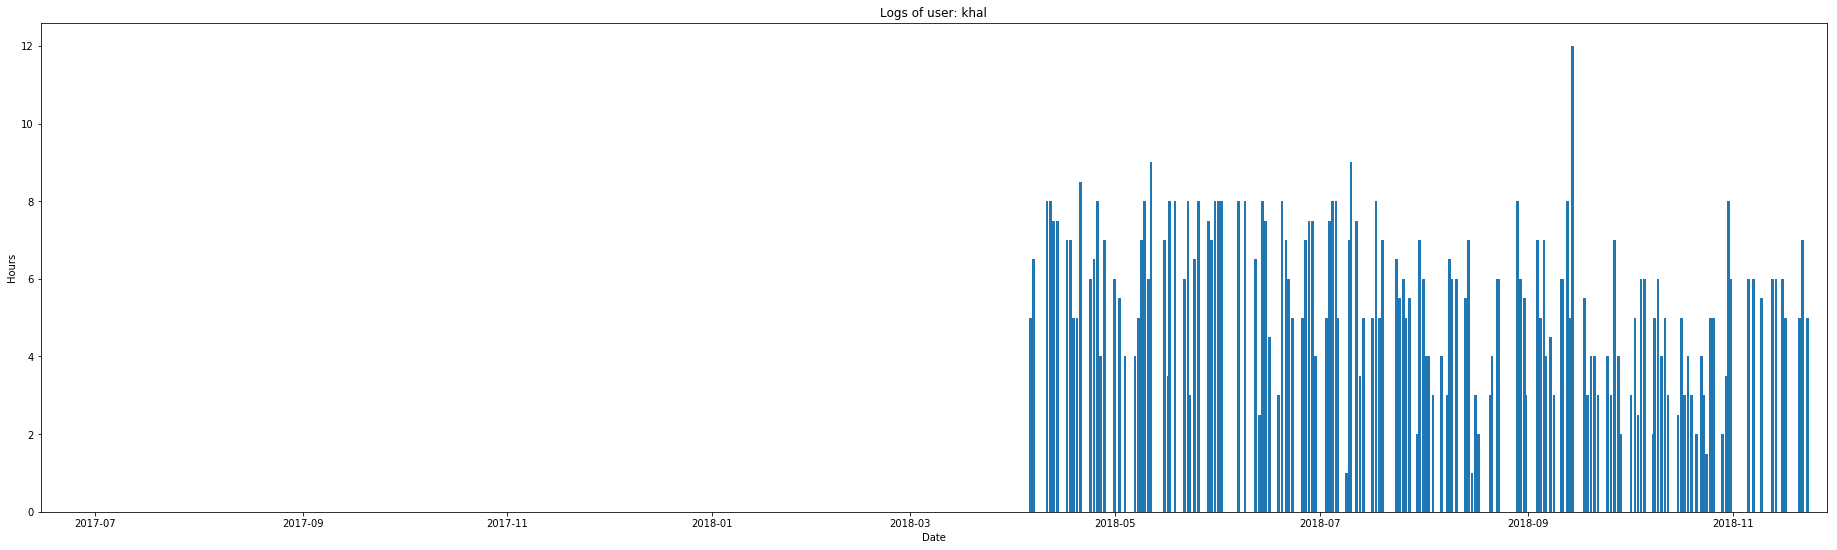

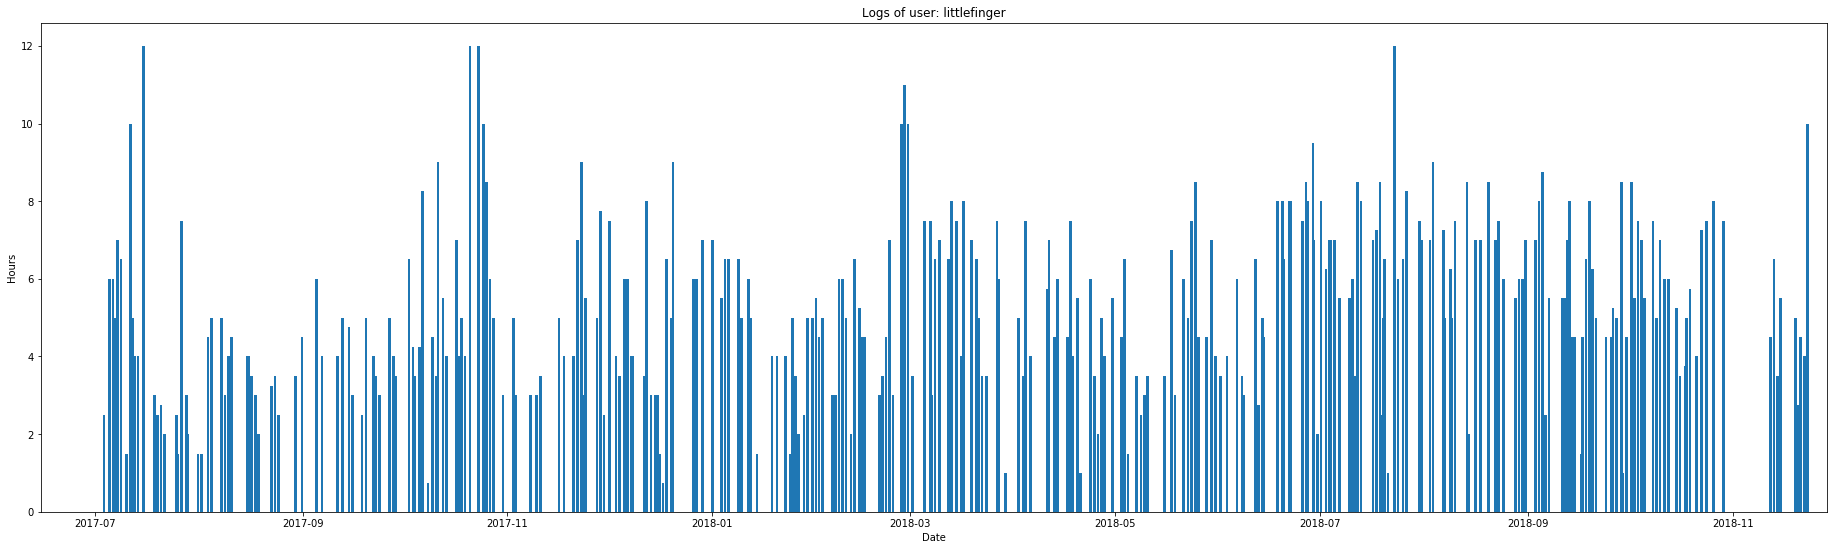

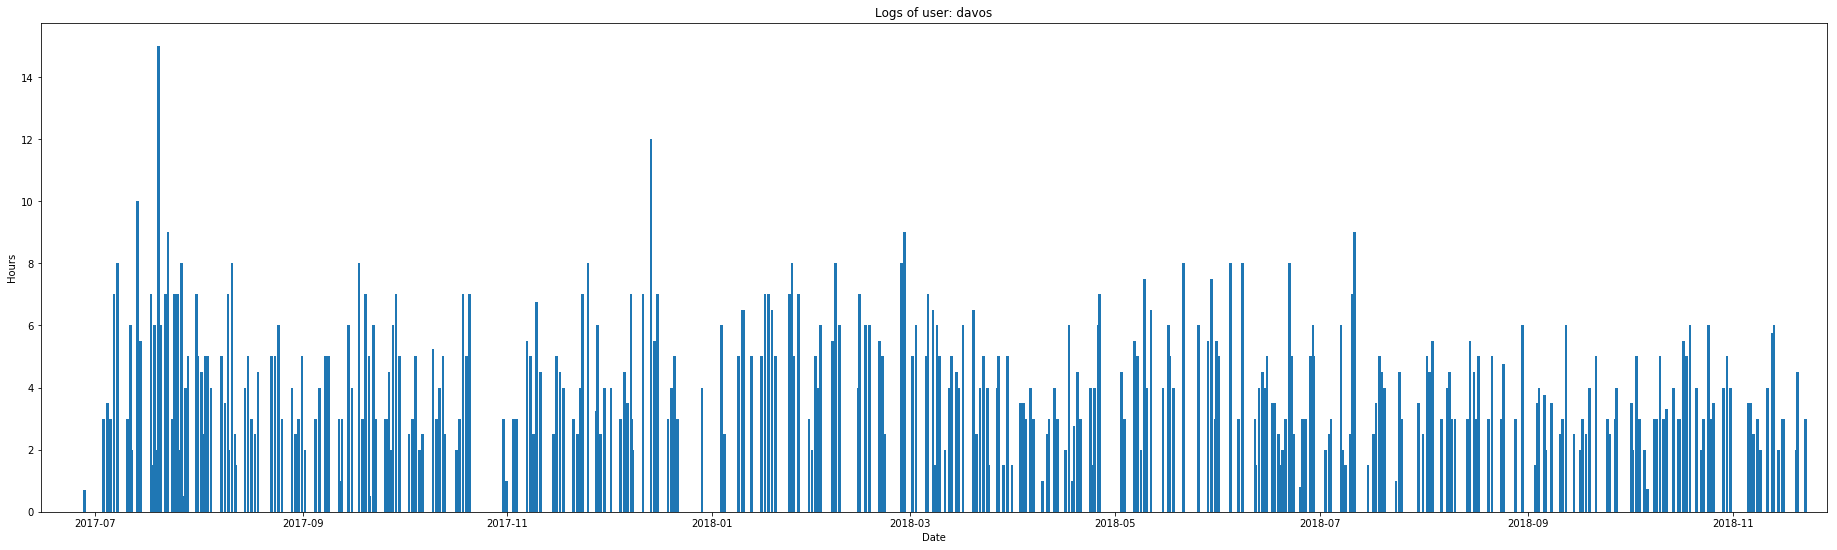

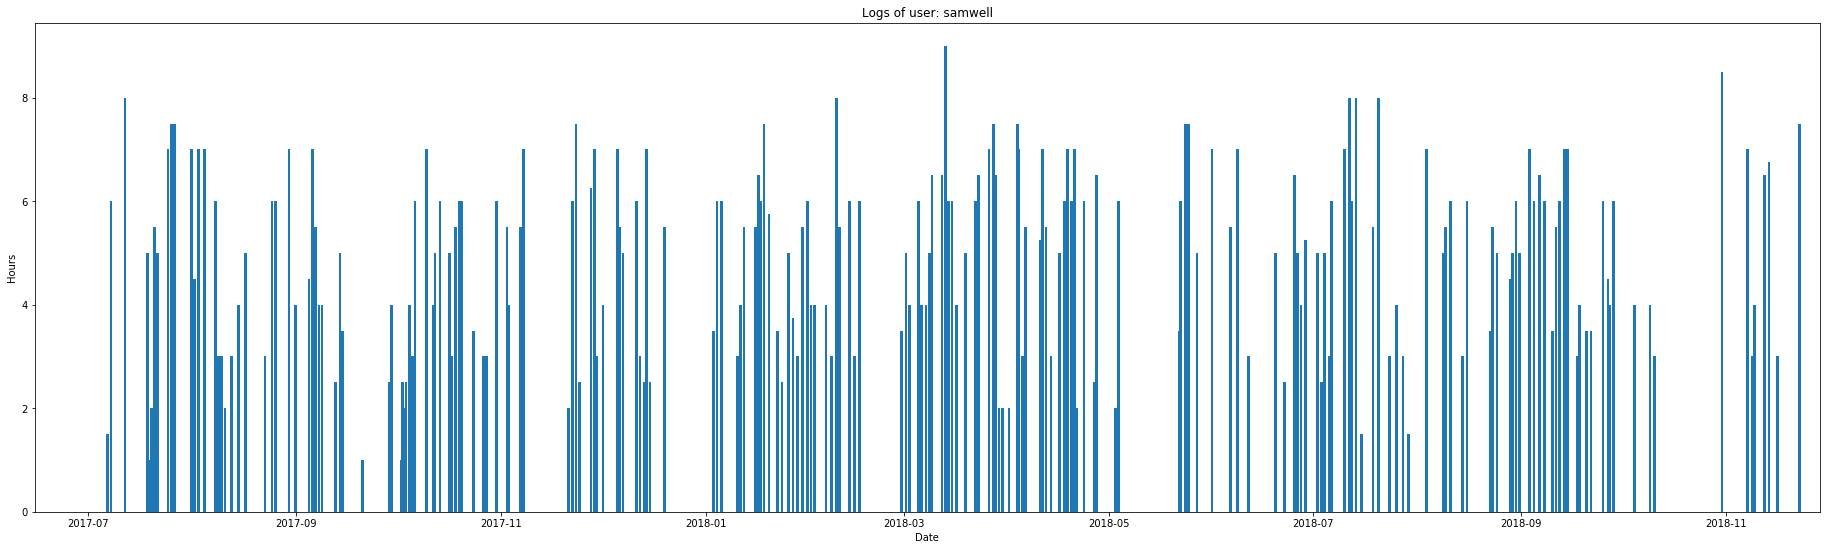

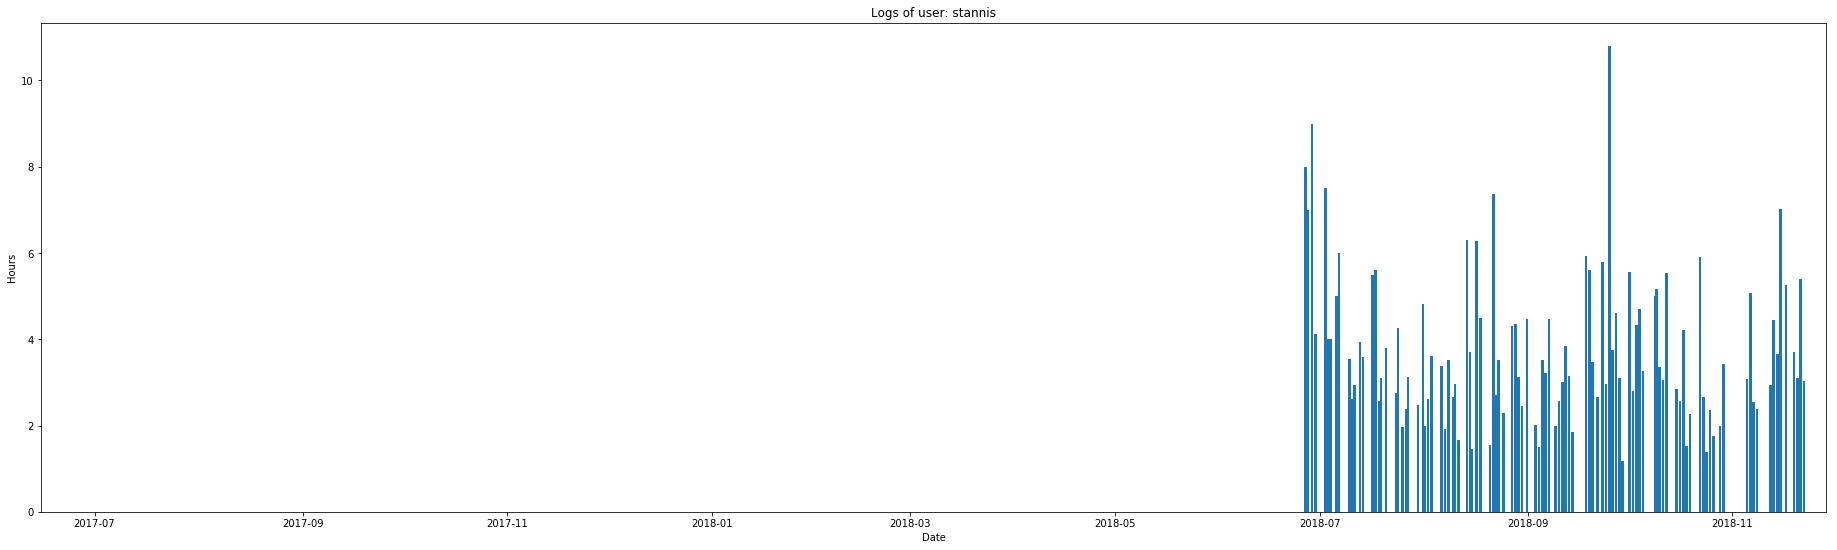

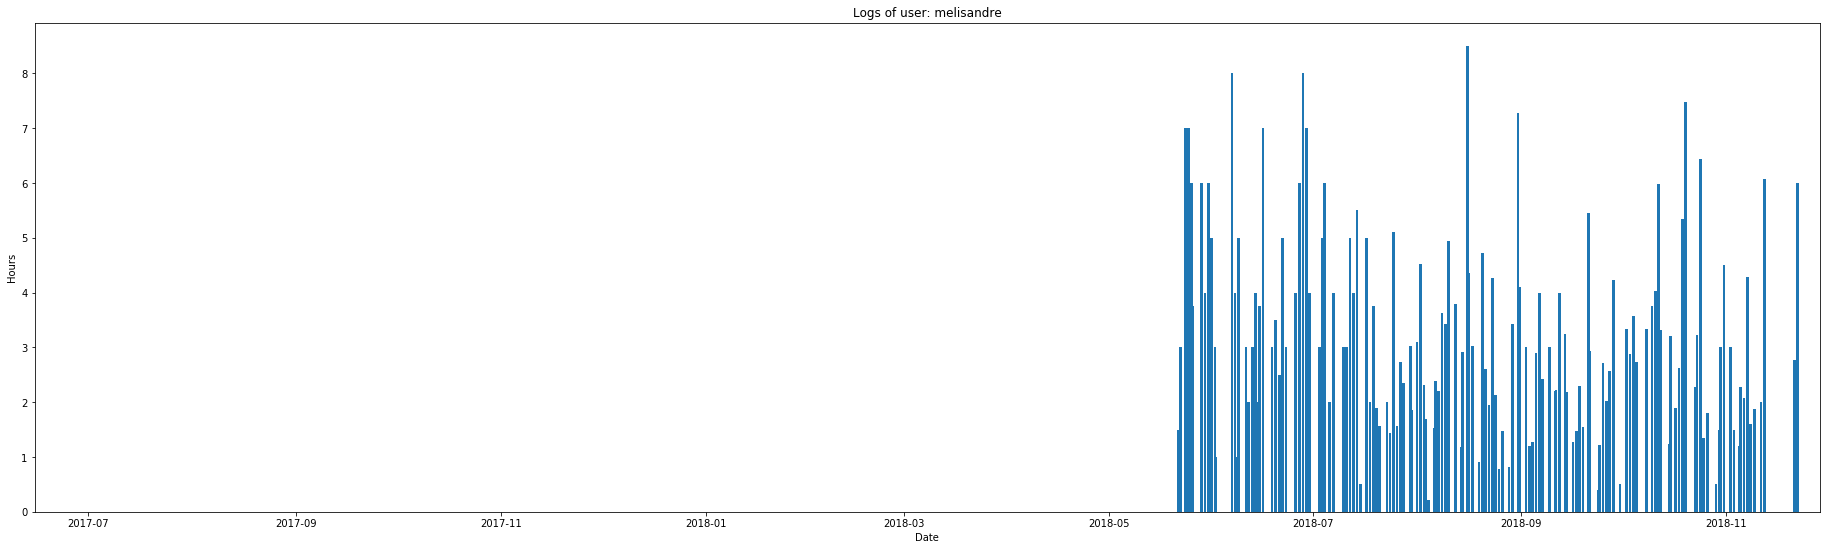

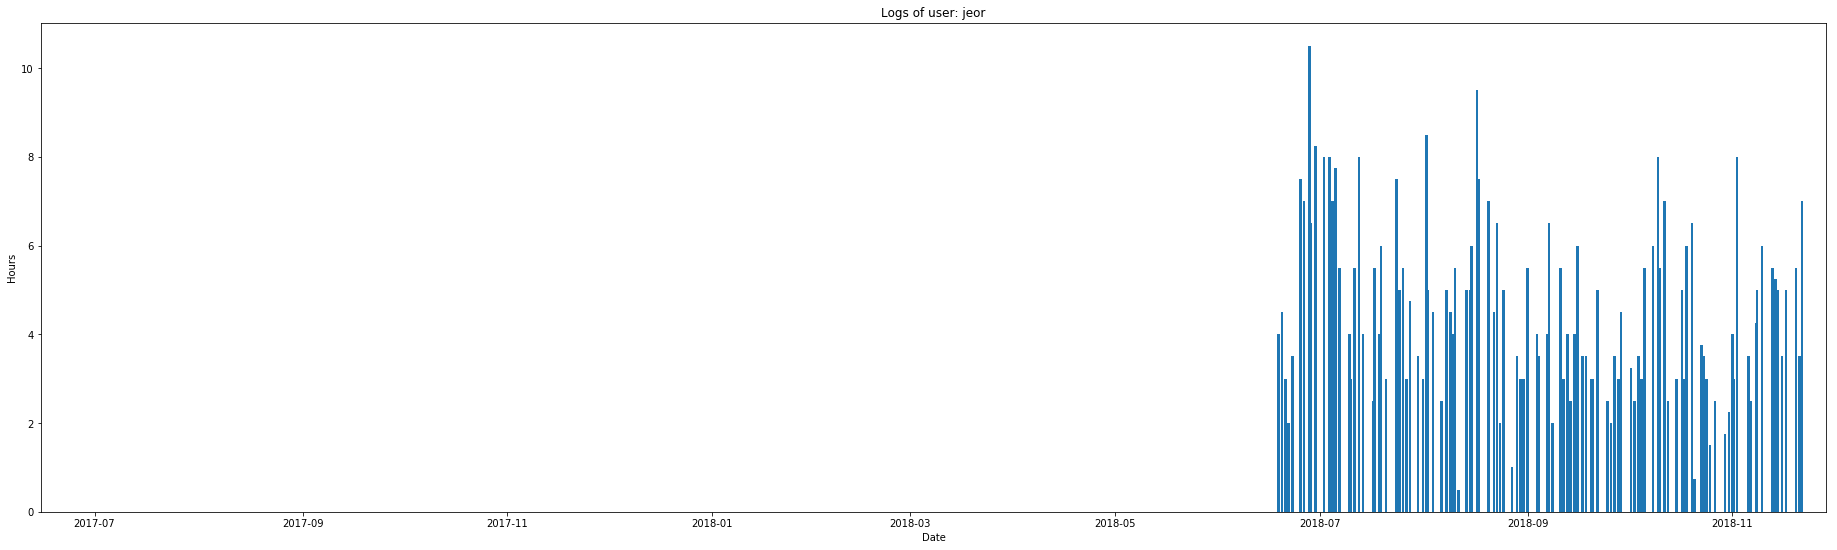

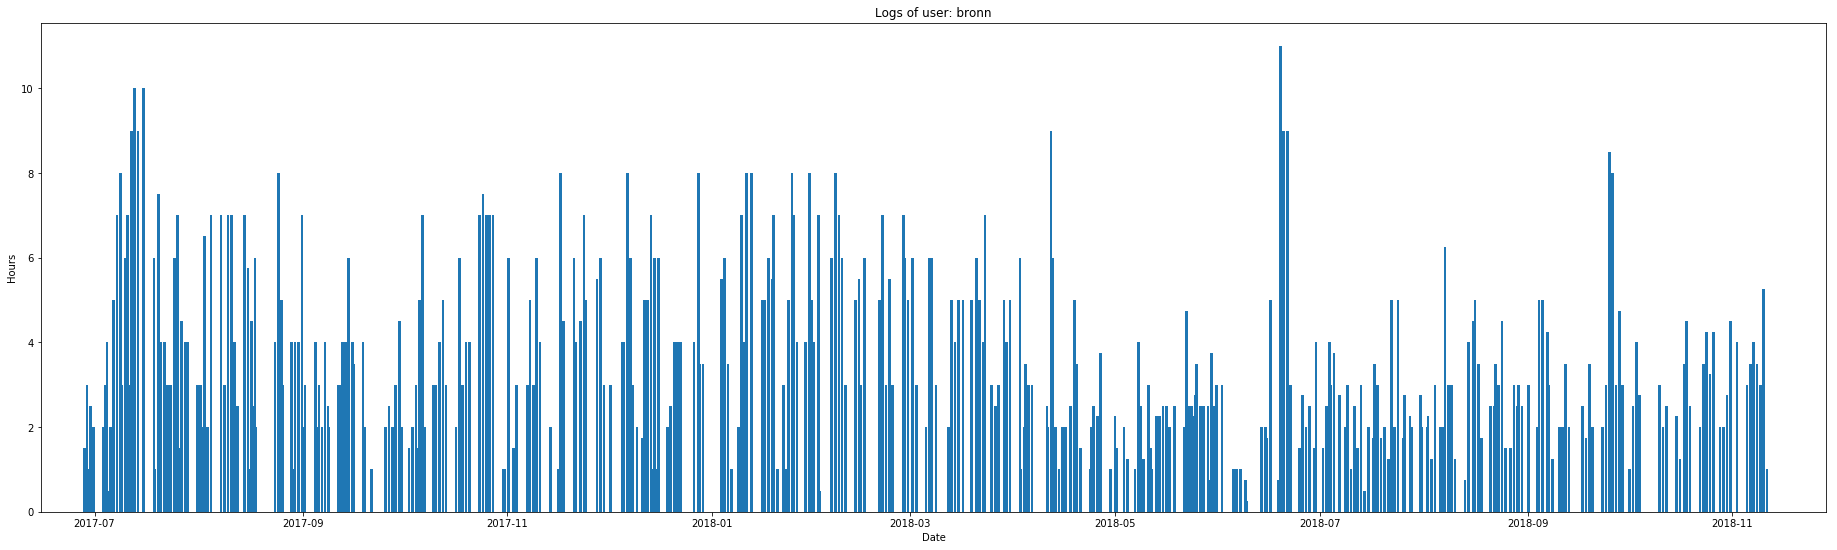

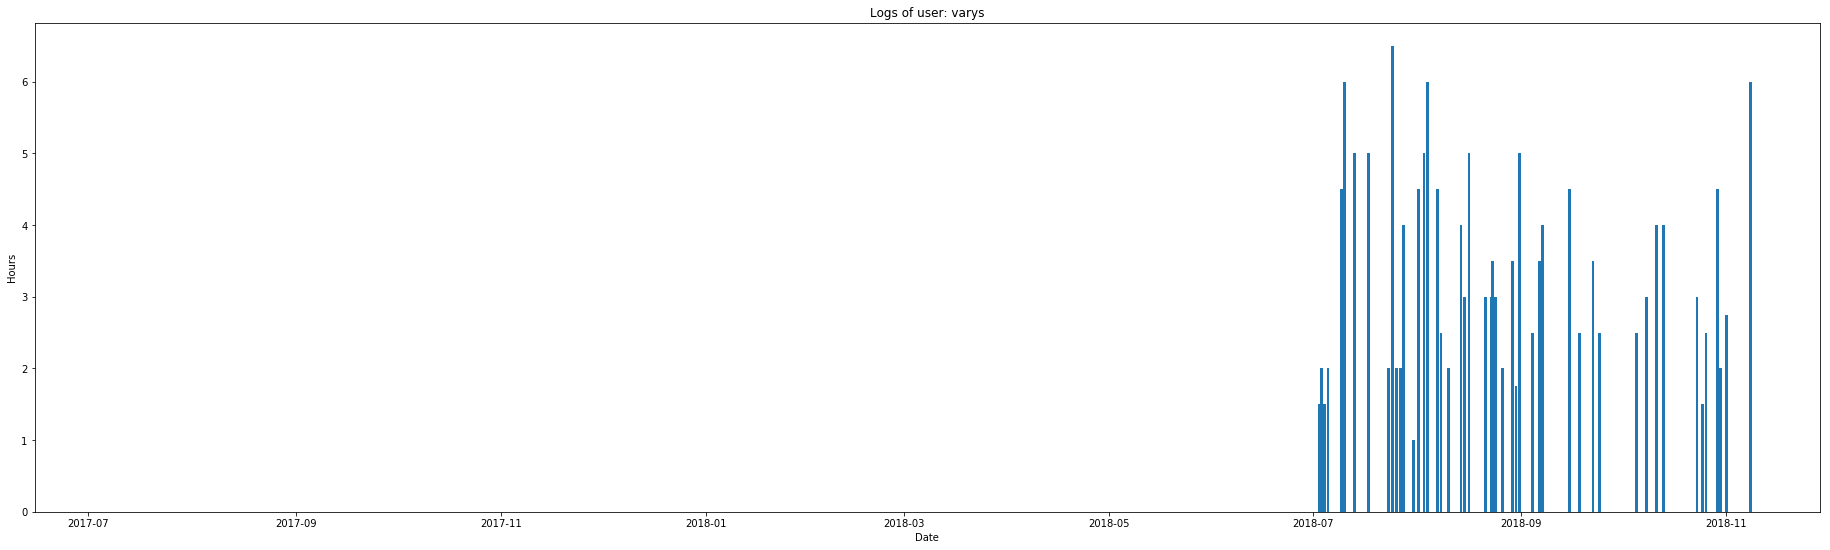

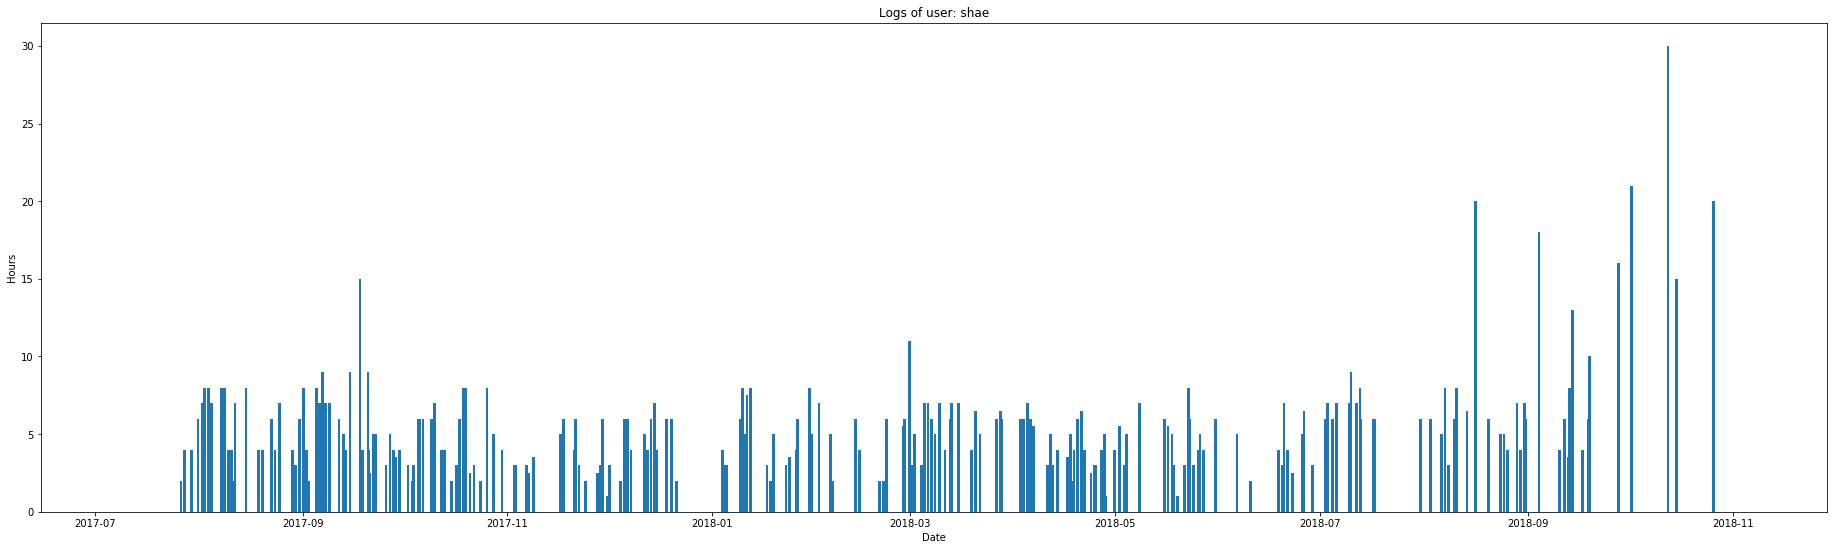

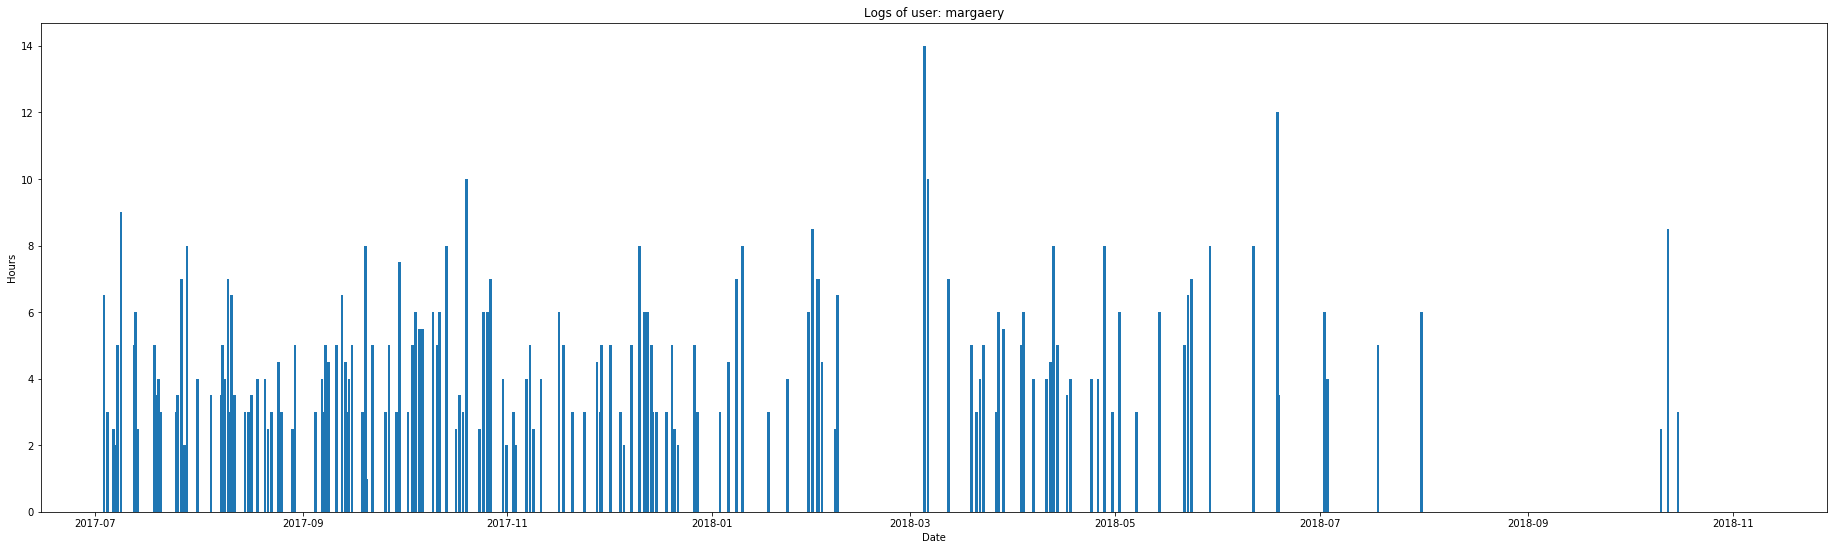

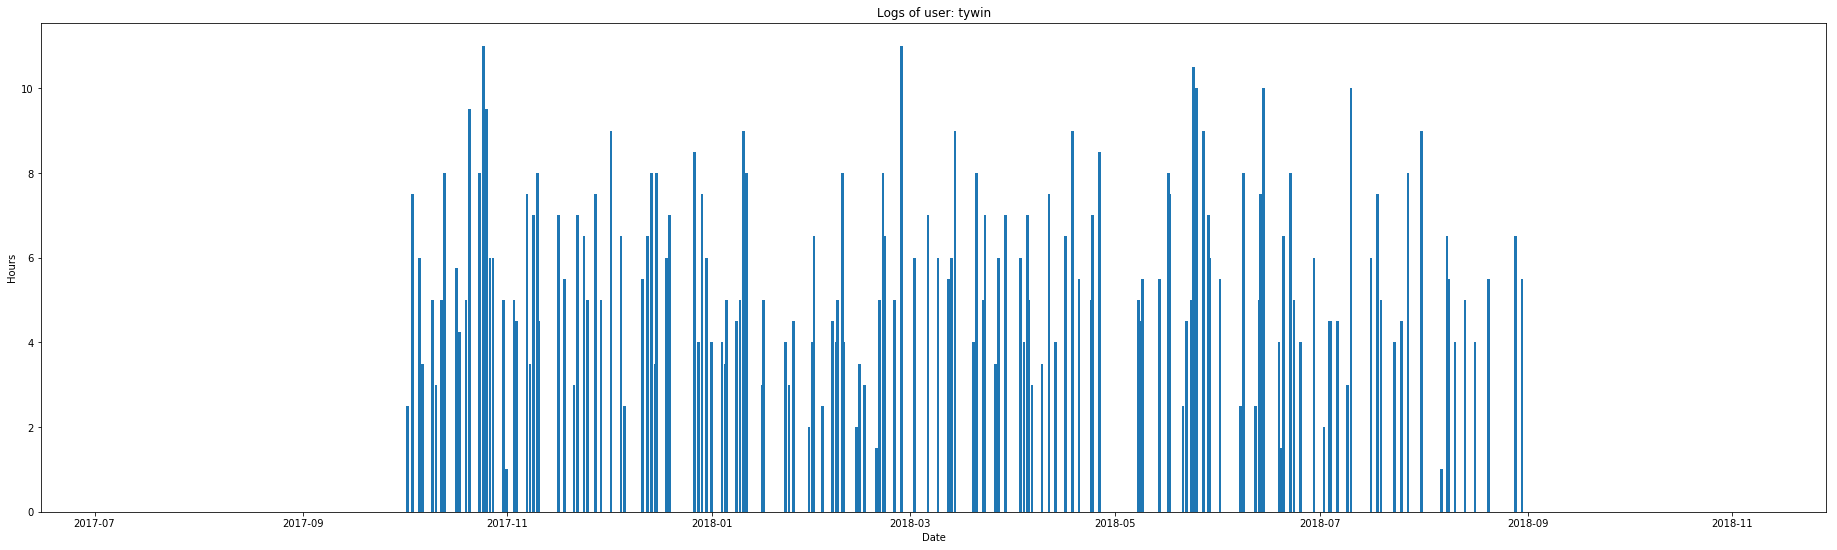

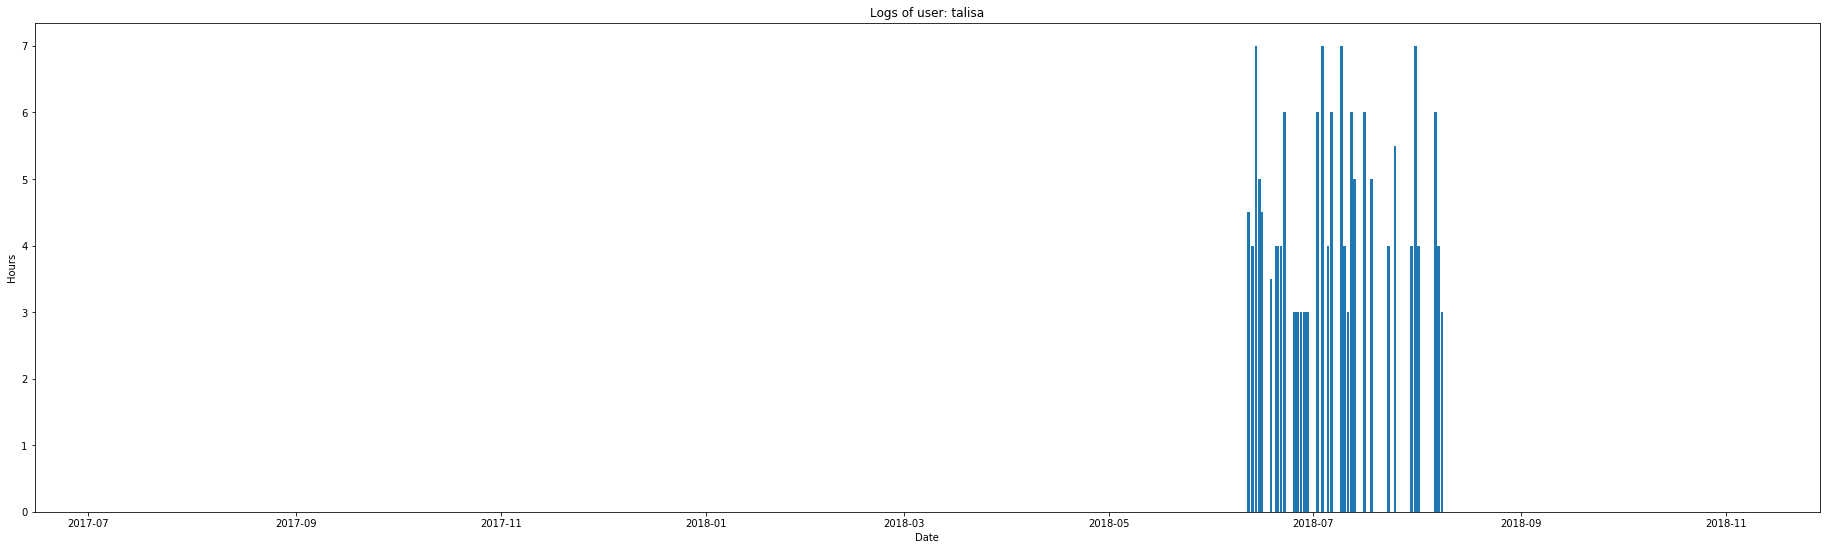

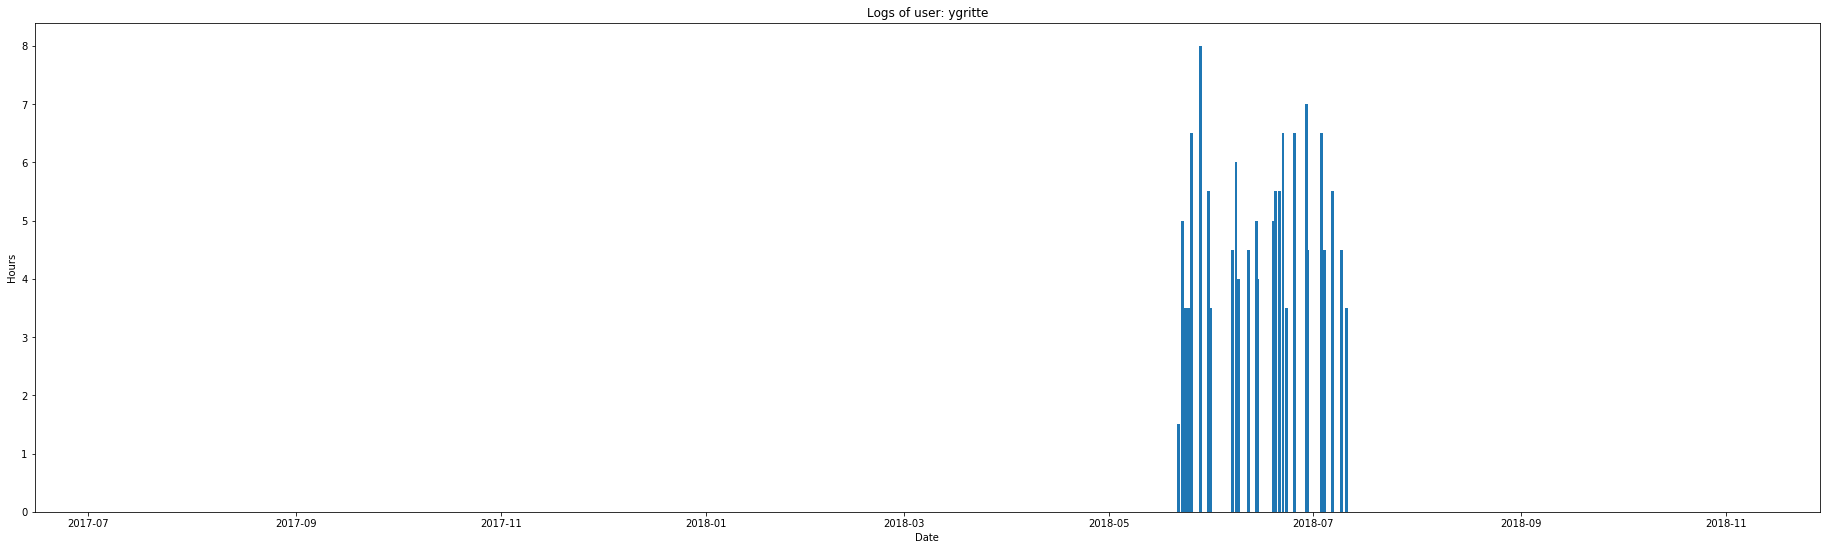

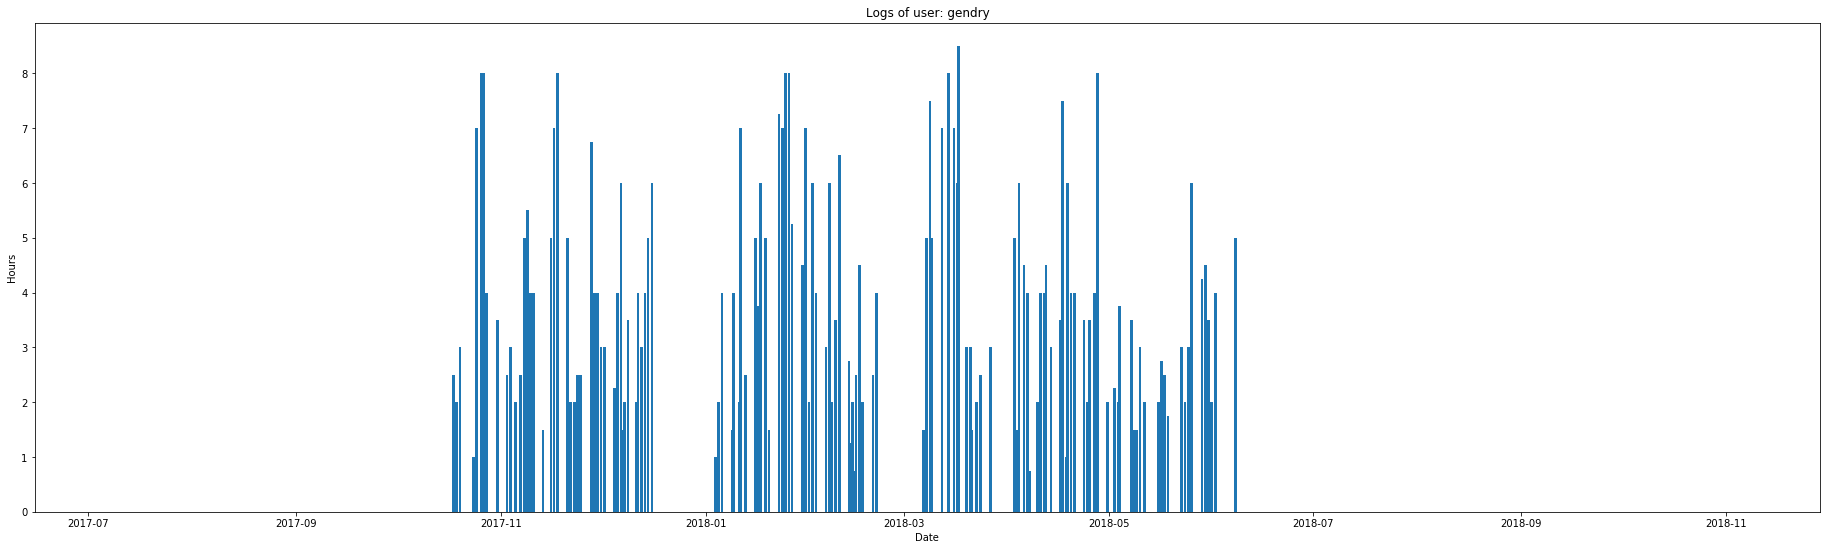

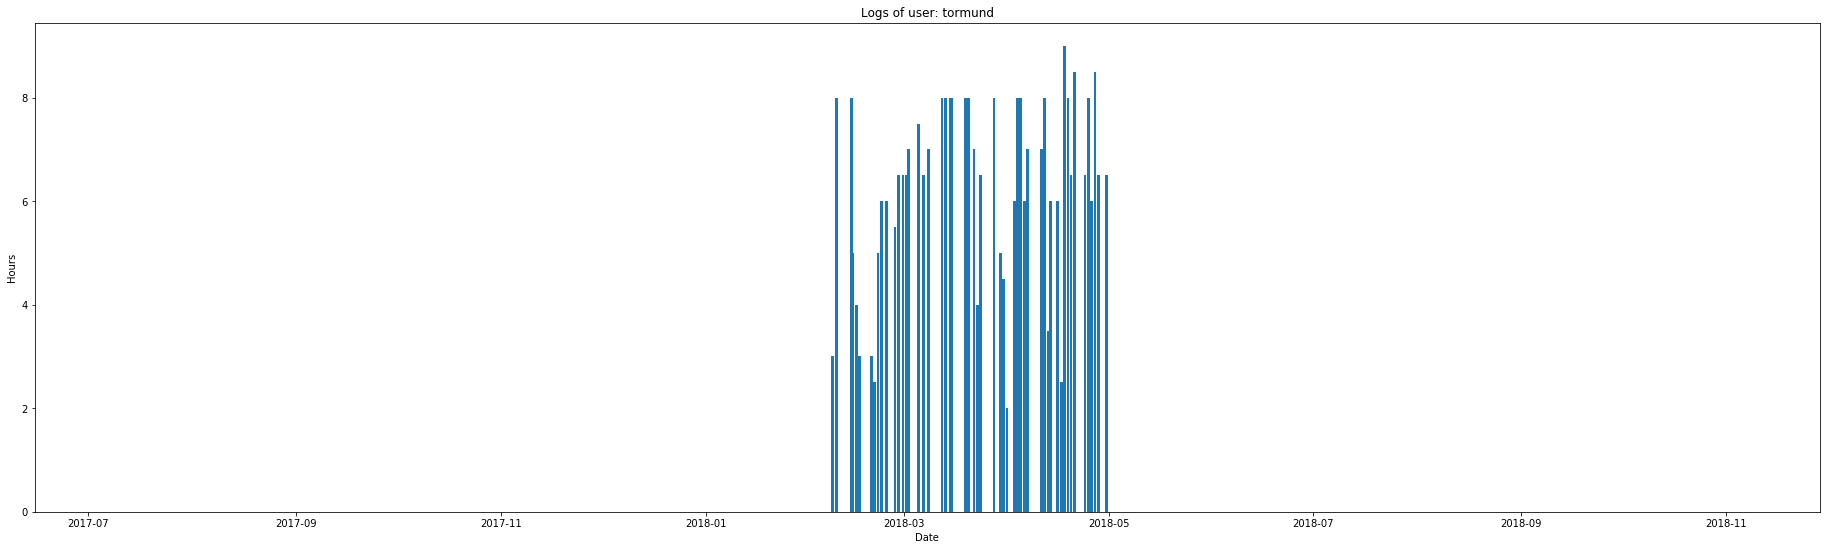

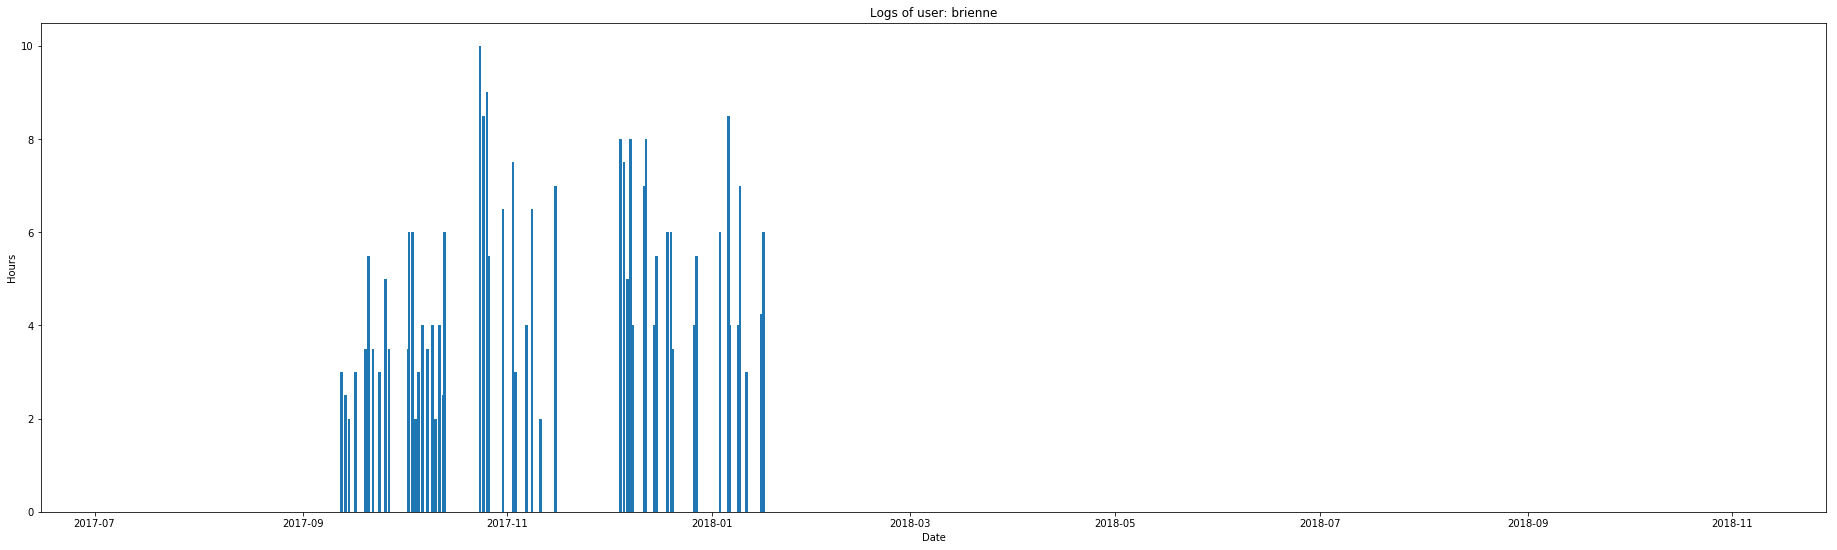

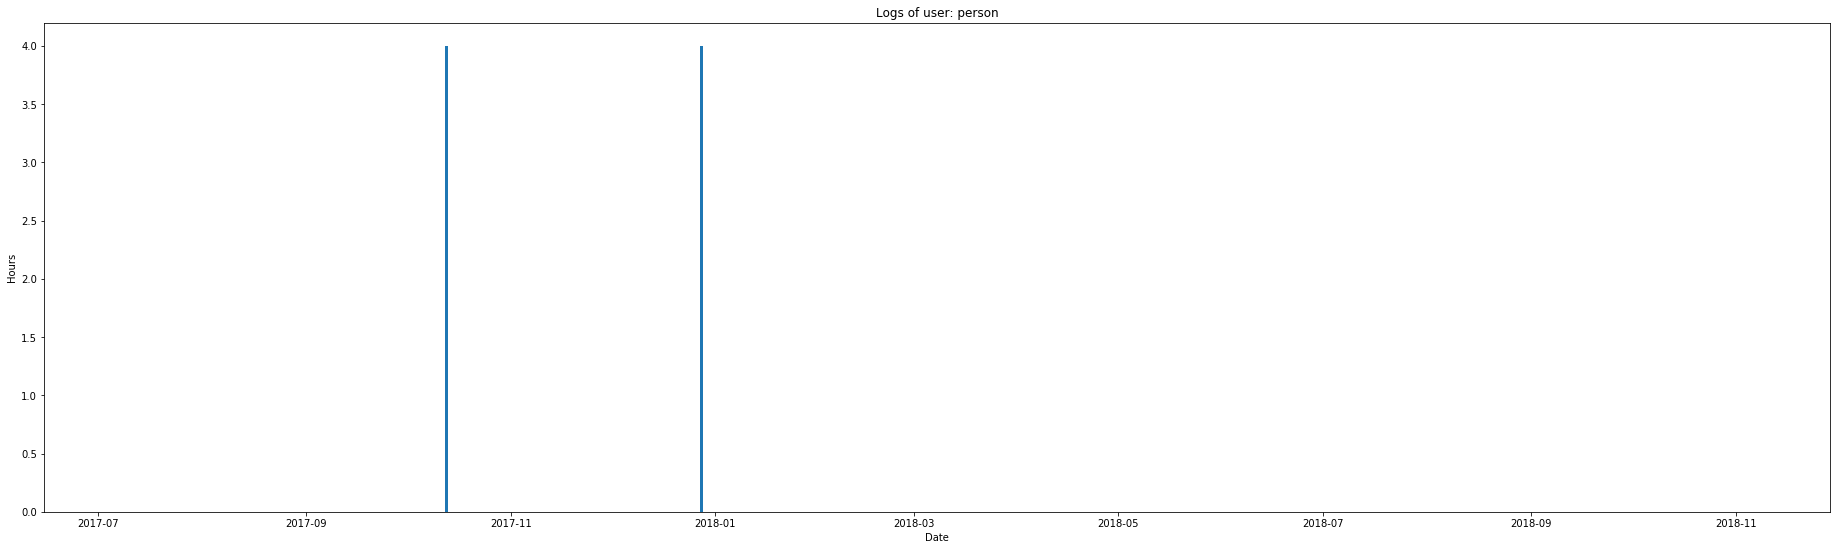

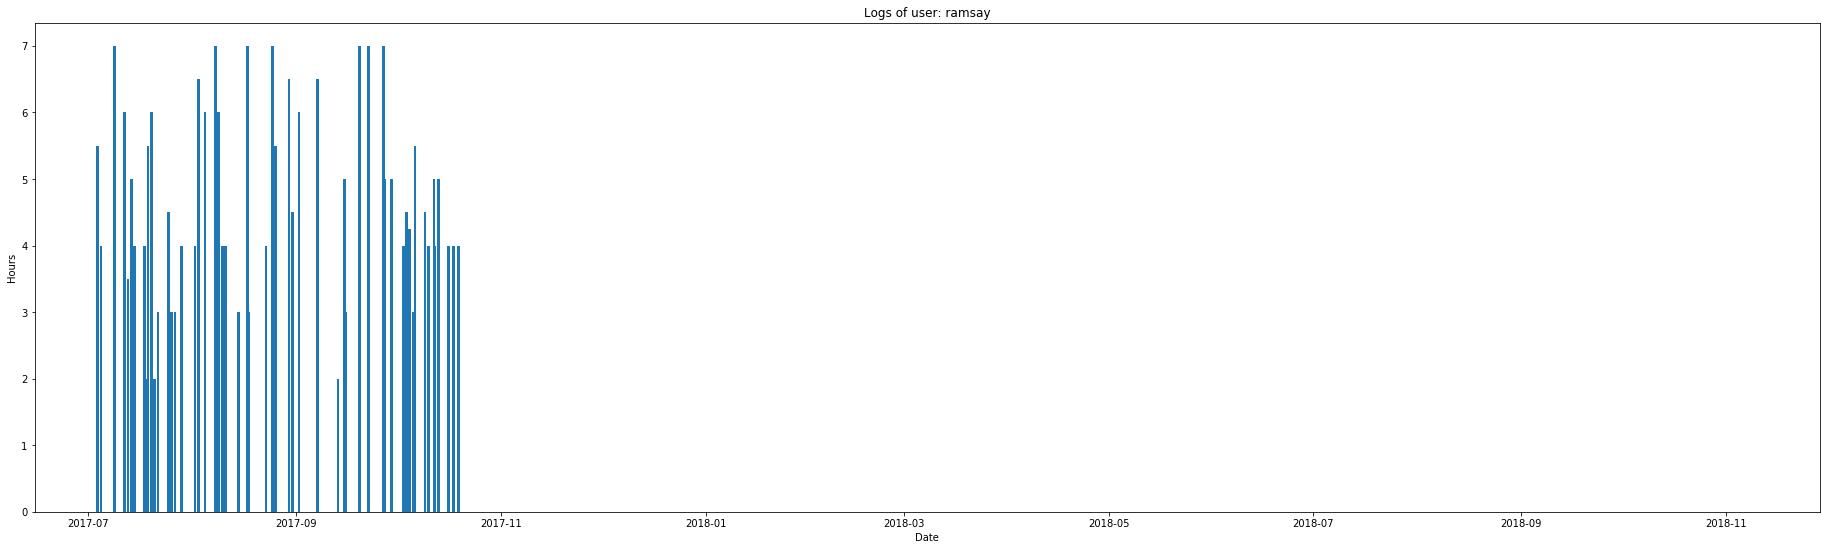

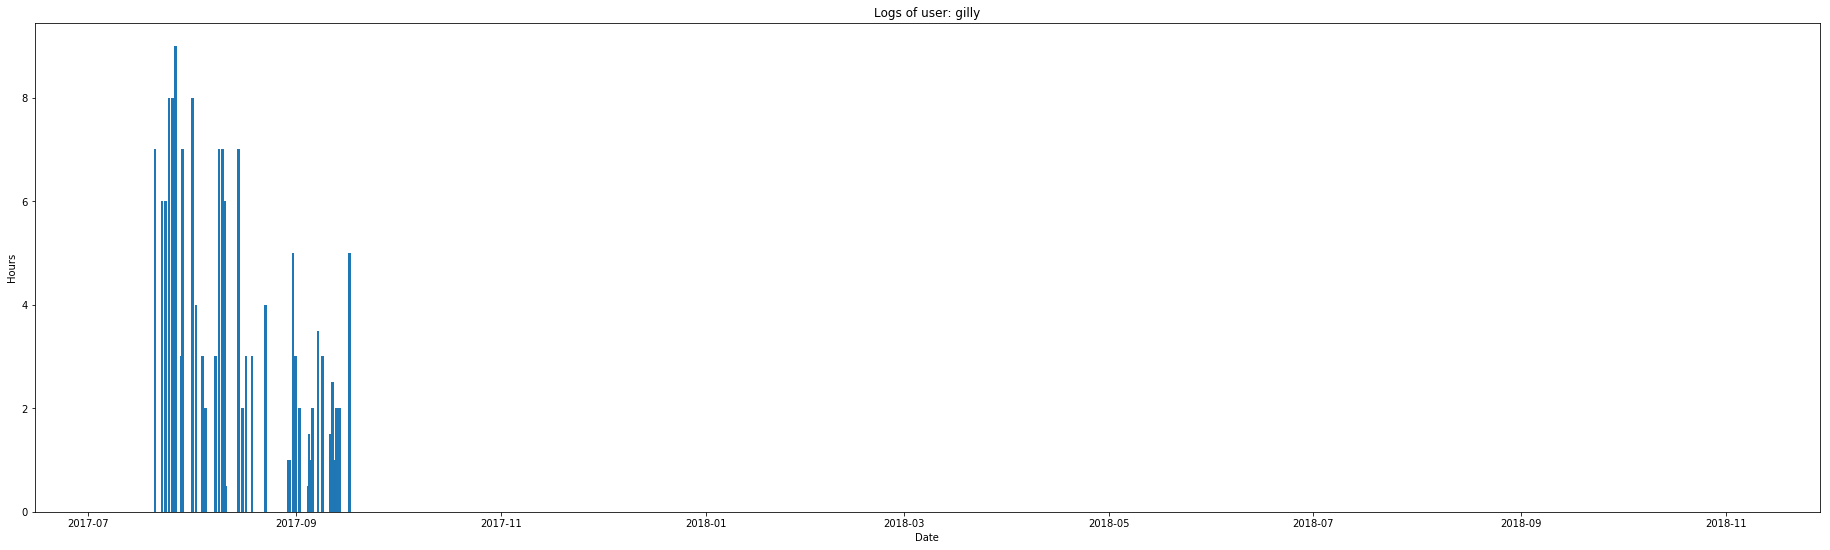

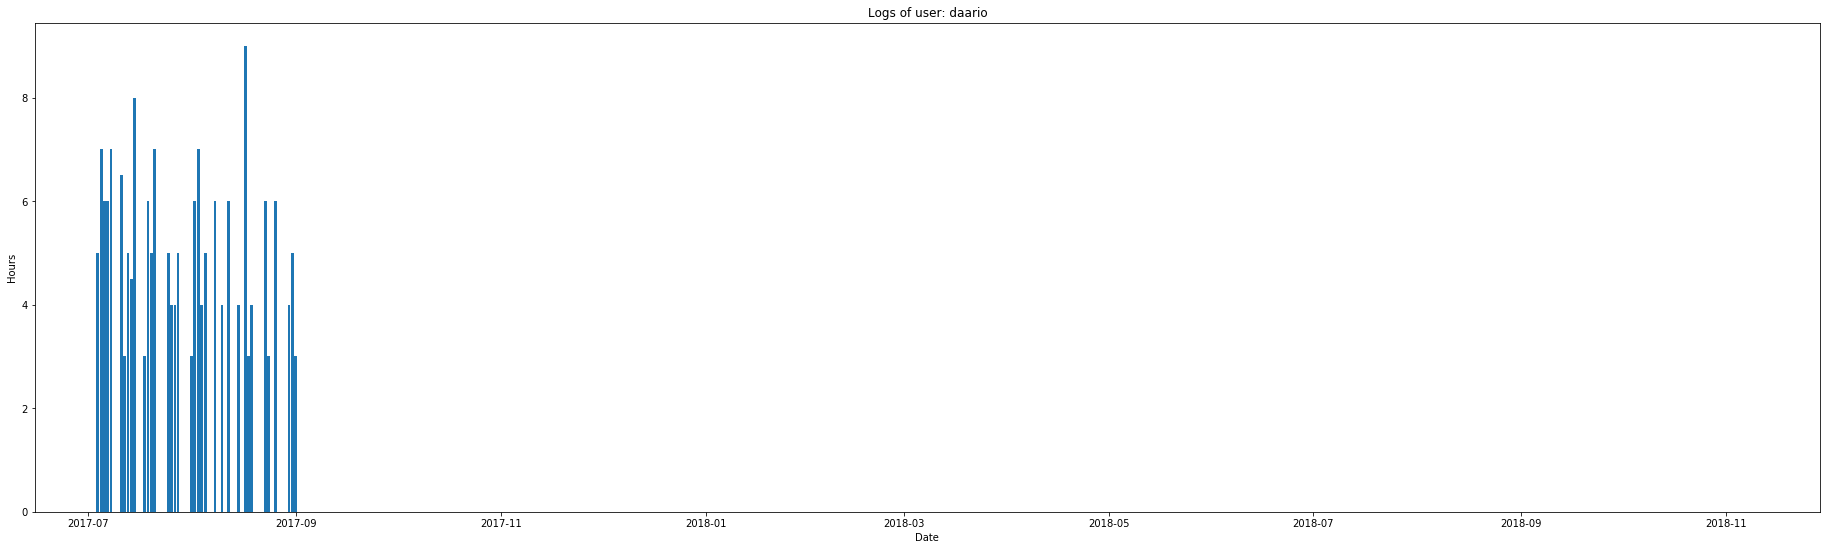

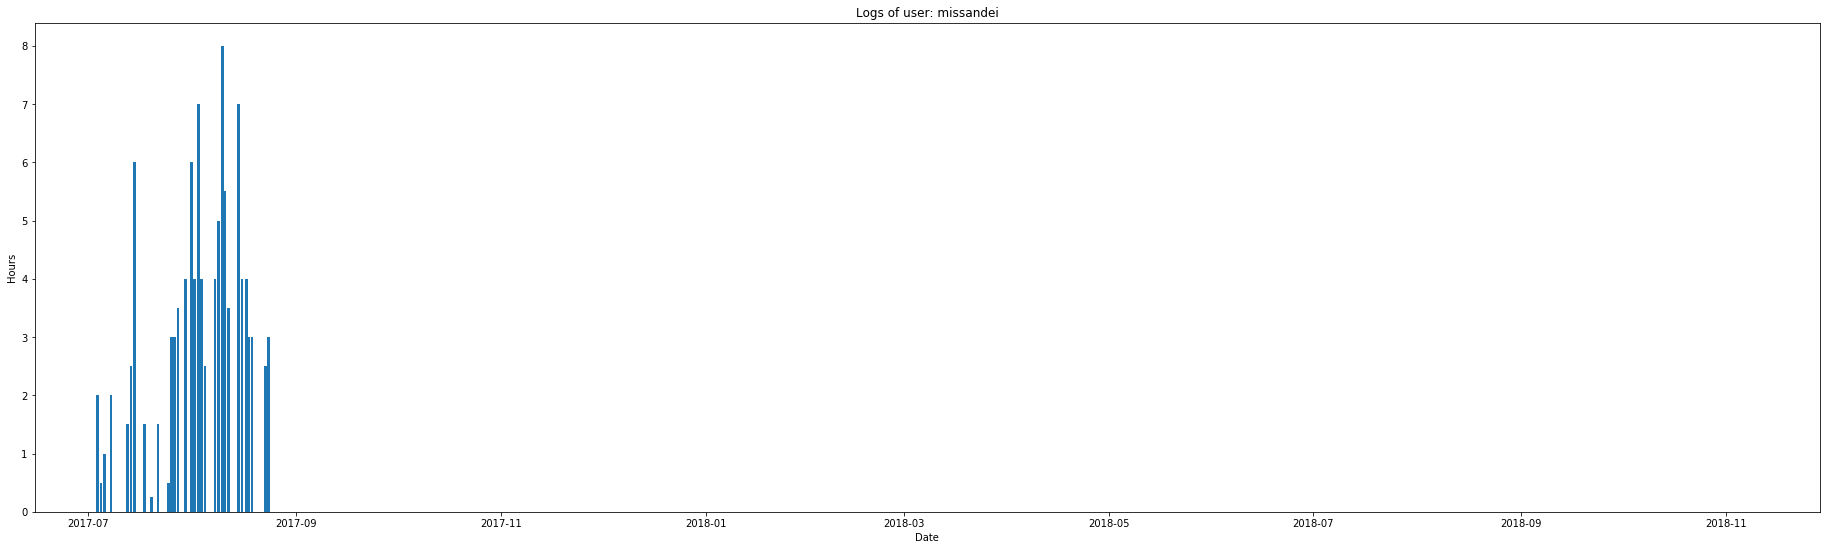

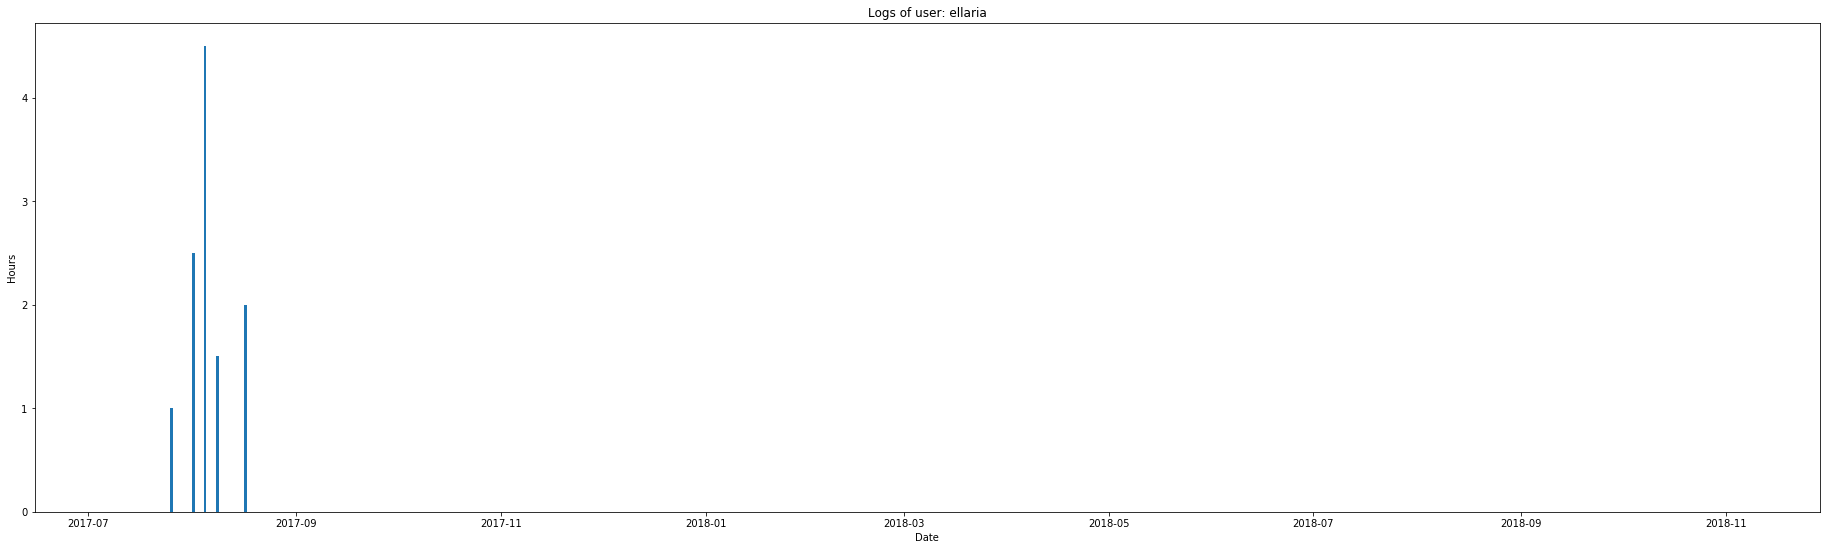

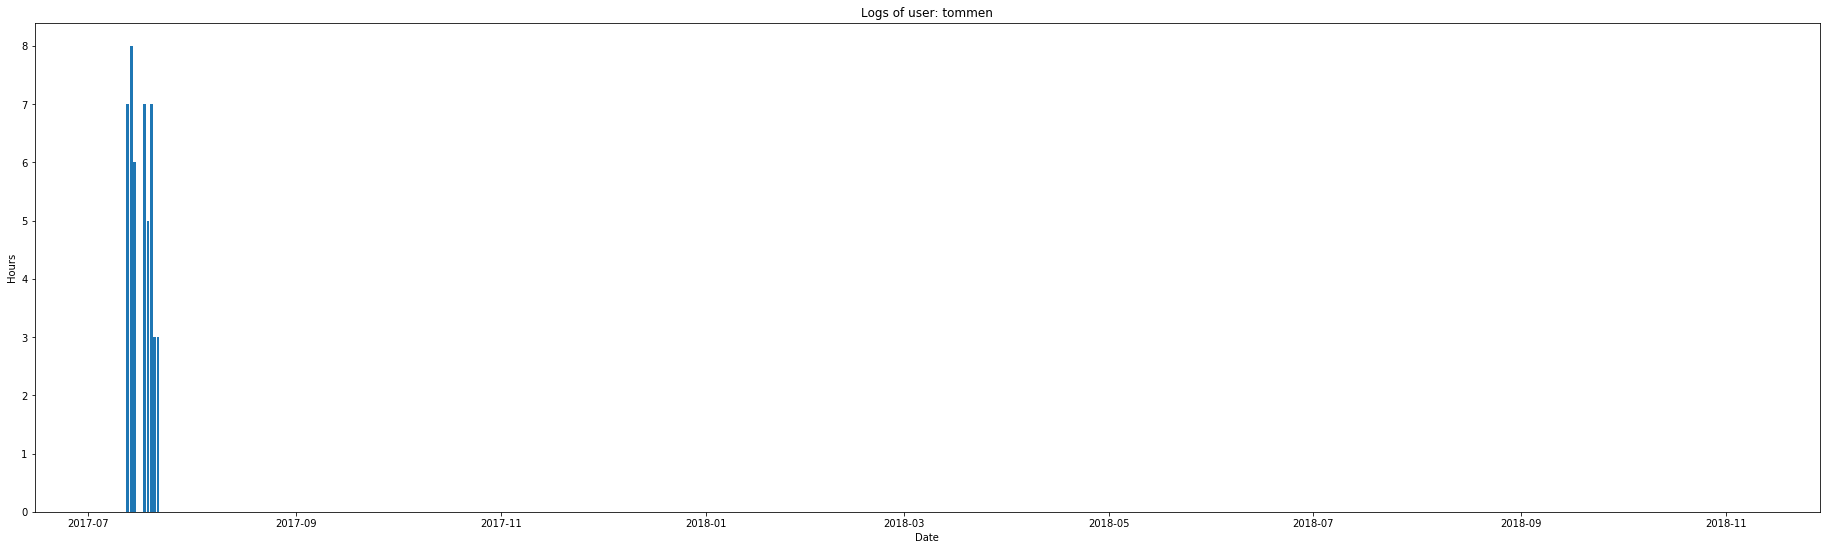

In [5]:
for user in users:
    userdata = ci_df[ci_df.user == user]
    userdata.timestamp = pd.to_datetime(userdata.timestamp)
    plt.figure(figsize=(32,9))
    plt.title('Logs of user: '+ user)
    plt.xlim(dstart, datenow)   
    plt.xlabel('Date')
    plt.ylabel('Hours')
    plt.bar(userdata.timestamp,userdata.hours)

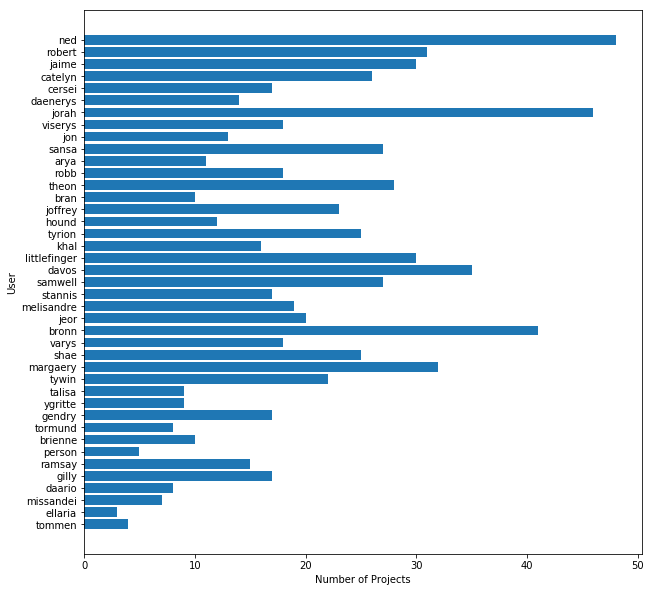

In [6]:
u = []
n = []

for user in users:
    userlog = ci_df[ci_df.user == user]
    userlog = userlog.reset_index()
    projuse = userlog.project.unique()
    u.append(user)
    n.append(int(len(projuse)))
    
plt.figure(figsize=(10,10))
plt.barh(u,n)
plt.xlabel('Number of Projects')
plt.ylabel('User')
plt.gca().invert_yaxis()

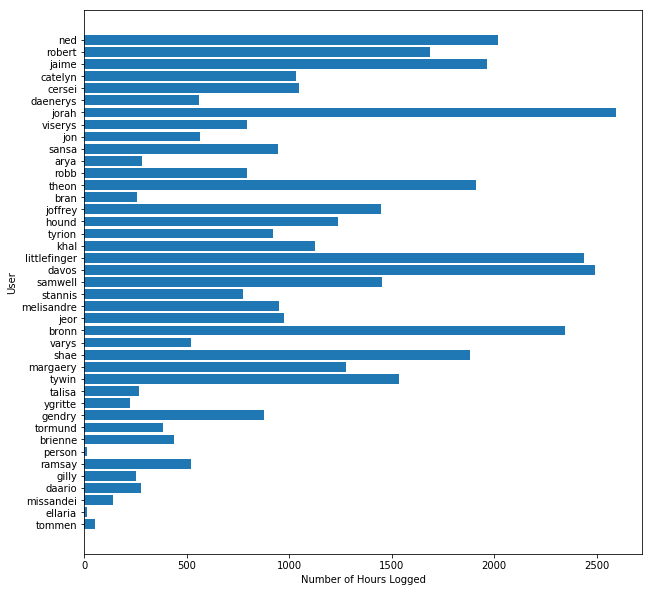

In [7]:
h = []
n = []

for user in users:
    userlog = ci_df[ci_df.user == user]
    userlog = userlog.reset_index()
    houruse = userlog.hours.sum()
    h.append(user)
    n.append(houruse)
    
plt.figure(figsize=(10,10))
plt.barh(h,n)
plt.xlabel('Number of Hours Logged')
plt.ylabel('User')
plt.gca().invert_yaxis()